In [1]:

import evoVAE.utils.visualisation as vs

import yaml
#pd.set_option("display.max_rows", None)
import matplotlib.pyplot as plt



This notebook handles visualisation of the VAE latent space. 

Instantiates a model from a dummy config, the most important thing is that the number of layers and latent space dimensions matches what you used for training, other hyperparameters in the config file do not matter. 

There a visualisations that shows how the model percieves the training data after training. 

There is a visualisation for a single tree and there is also functionality to write these 3D coordinates out to a file

# Model init

In [2]:
with open("../data/dummy_config.yaml", "r") as stream:
    settings = yaml.safe_load(stream)


# Visualising training data

This is going to need to be done on a GPU, can't run it on my local device. 

# GFP 

#### Visualise the latent space

In [ ]:
path = "/Users/sebs_mac/uni_OneDrive/honours/data/gfp/independent_runs/no_synthetic/alns/"
gfp_ae_latent, gfp_a_latent, gfp_e_latent = vs.get_model_embeddings(path, 
                                                                 ae_file_name="gfp_ancestors_extants_no_syn_no_dupes.pkl",
                                                                 variant_path="/Users/sebs_mac/git_repos/dms_data/DMS_ProteinGym_substitutions/GFP_AEQVI_Sarkisyan_2016.csv",
                                                                 ae_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/gfp_standard/gfp_ae/gfp_ae_r9/gfp_ae_r9_model_state.pt",
                                                                 a_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/gfp_standard/gfp_a/gfp_a_r4/gfp_a_r4_model_state.pt",
                                                                 e_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/gfp_standard/gfp_e/gfp_e_r10/gfp_e_r10_model_state.pt",
                                                                 settings=settings)

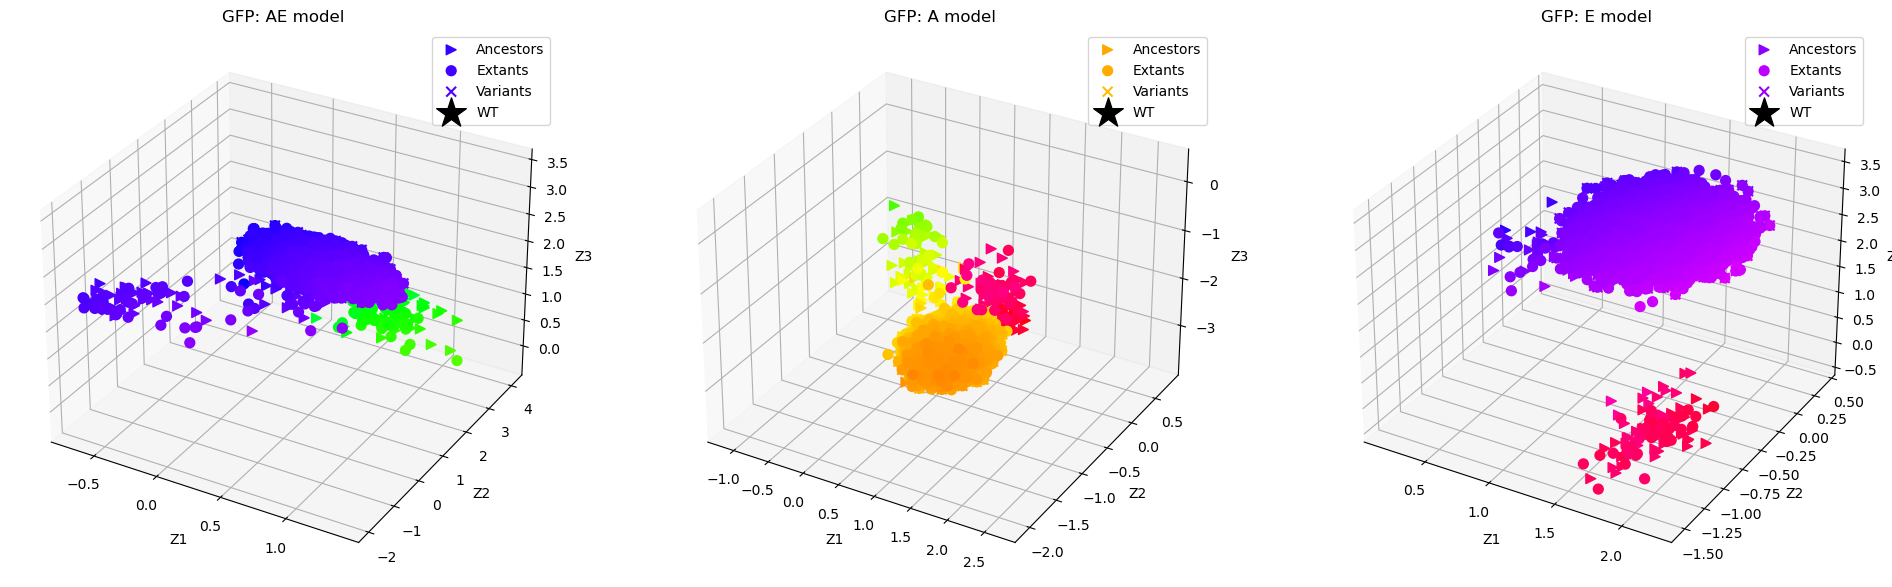

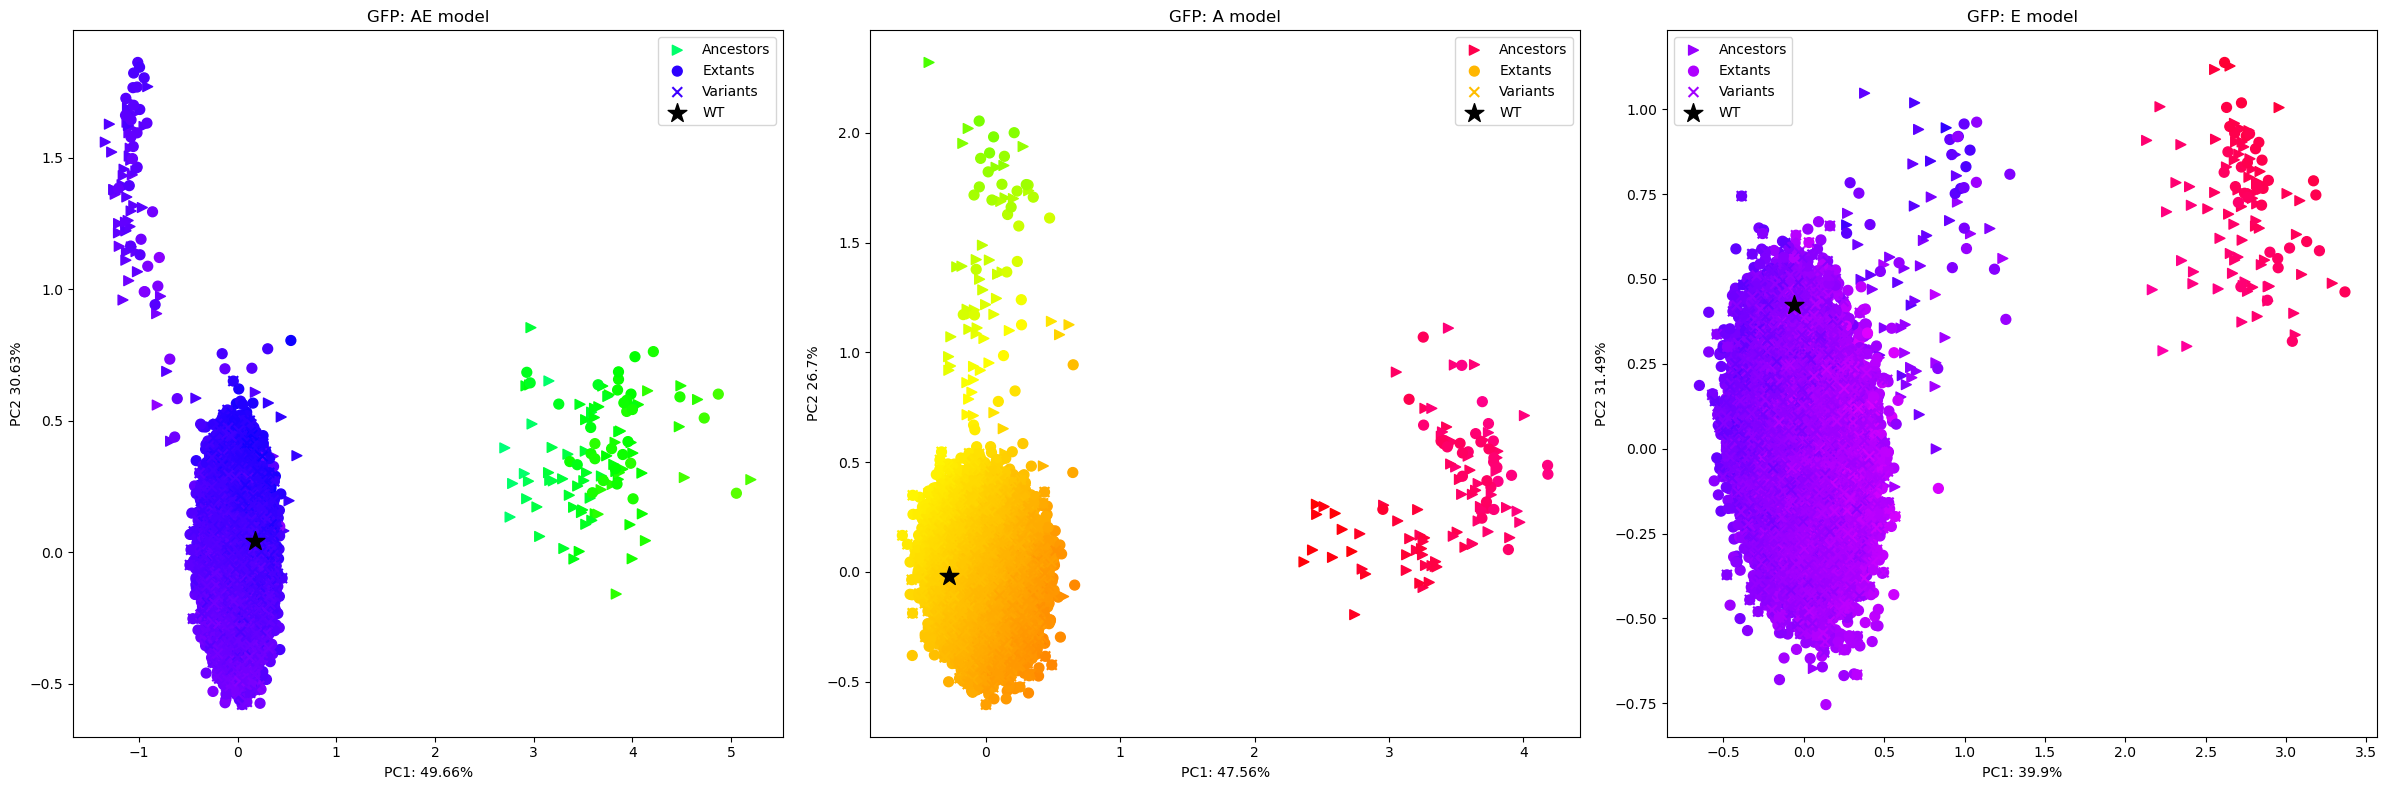

In [ ]:
model_reps = [gfp_ae_latent, gfp_a_latent, gfp_e_latent]
labels = ["AE model", "A model", "E model"]

fig, axes = plt.subplots(1, 3, figsize=(24, 8), subplot_kw={'projection': '3d'})

for rep, label, ax in zip(model_reps, labels, axes):
    ax.set_title("GFP: " + label)
    vs.tree_vis_3d(rep, "GFP_AEQVI/1-238", rgb=True, ax=ax)

  
#plt.tight_layout()
plt.savefig("gfp_3D_rgb.png", dpi=300)
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(24, 8))

for rep, label, ax in zip(model_reps, labels, axes):
    ax.set_title("GFP: " + label)
    vs.tree_vis_2d(rep, "GFP_AEQVI/1-238", rgb=True, ax=ax)

plt.tight_layout()
#plt.savefig("gfp_2D_rgb.png", dpi=300)
plt.show()



#### GFP - convert latent space coordinates to ITOL annotations 

In [ ]:

path = "/Users/sebs_mac/uni_OneDrive/honours/data/gfp/independent_runs/no_synthetic/ancestors/auto_rooted/ancestors/"
gfp_tree = path + "run_1_ancestors_extants.fa"

vs.latent_tree_to_itol("gfp", 
                 tree_seq_path=gfp_tree, 
                 ae_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/gfp_standard/gfp_ae/gfp_ae_r9/gfp_ae_r9_model_state.pt",
                 a_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/gfp_standard/gfp_a/gfp_a_r4/gfp_a_r4_model_state.pt",
                 e_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/gfp_standard/gfp_e/gfp_e_r10/gfp_e_r10_model_state.pt",
                 settings=settings
                 )

Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/gfp/independent_runs/no_synthetic/ancestors/auto_rooted/ancestors/run_1_ancestors_extants.fa
Checking for bad characters: ['B', 'J', 'X', 'Z', 'U']
Number of seqs: 719


# GB1

#### Visualise the latent space

In [ ]:
path = "/Users/sebs_mac/uni_OneDrive/honours/data/gb1/alns/"
gb1_ae_latent, gb1_a_latent, gb1_e_latent = vs.get_model_embeddings(path, 
                                                                 ae_file_name="gb1_ancestors_extants_no_dupes.pkl",
                                                                 variant_path="/Users/sebs_mac/git_repos/dms_data/DMS_ProteinGym_substitutions/SPG1_STRSG_Wu_2016.csv",
                                                                 ae_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/raw_data/gb1_standard/gb1_ae/gb1_ae_r1/gb1_ae_r1_model_state.pt",
                                                                 a_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/raw_data/gb1_standard/gb1_a/gb1_a_r2/gb1_a_r2_model_state.pt",
                                                                 e_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/raw_data/gb1_standard/gb1_e/gb1_e_r2/gb1_e_r2_model_state.pt",
                                                                 settings=settings)

In [ ]:
gb1_ae_latent.tail()

id                                                 mu         pca
163631  V280R  [-0.06978689134120941, -0.08579408377408981, 0...  [0.0, 0.0]
163632  V280S  [-0.06978689134120941, -0.08579408377408981, 0...  [0.0, 0.0]
163633  V280T  [-0.06978689134120941, -0.08579408377408981, 0...  [0.0, 0.0]
163634  V280W  [-0.06978689134120941, -0.08579408377408981, 0...  [0.0, 0.0]
163635  V280Y  [-0.06978689134120941, -0.08579408377408981, 0...  [0.0, 0.0]

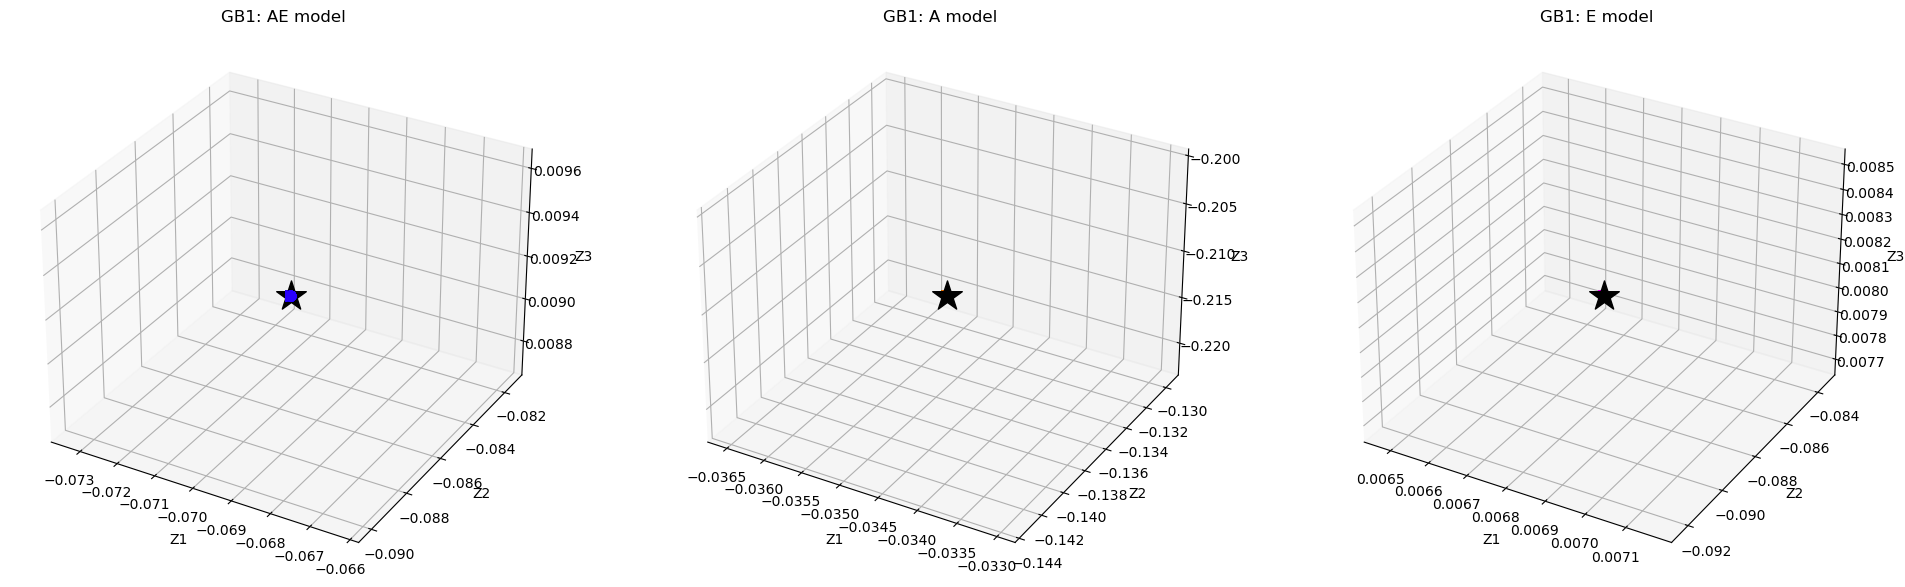

/Users/sebs_mac/miniconda3/envs/embed/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:640: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var
/Users/sebs_mac/miniconda3/envs/embed/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:640: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var
/Users/sebs_mac/miniconda3/envs/embed/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:640: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var


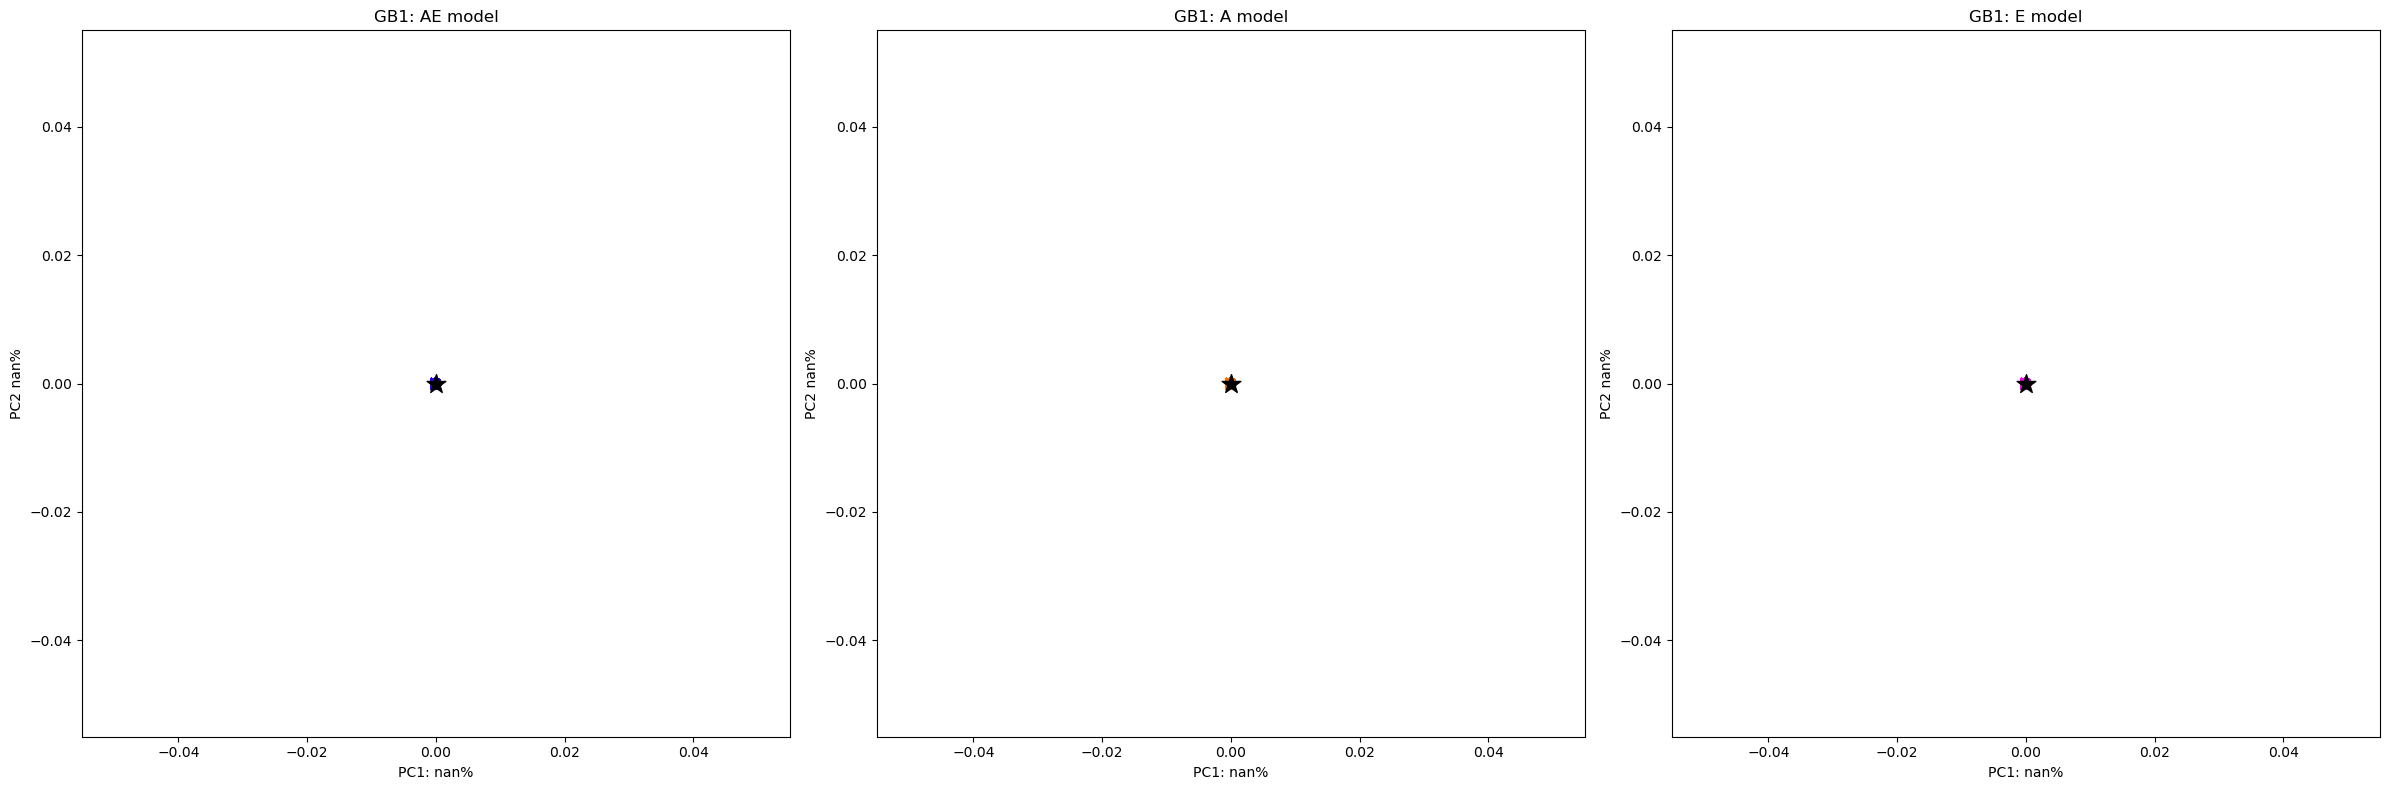

In [ ]:

model_reps = [gb1_ae_latent, gb1_a_latent, gb1_e_latent]
labels = ["AE model", "A model", "E model"]

fig, axes = plt.subplots(1, 3, figsize=(24, 8), subplot_kw={'projection': '3d'})

for rep, label, ax in zip(model_reps, labels, axes):
    tree_vis_3d(rep, "SPG1_STRSG/1-448", rgb=True, ax=ax)
    ax.set_title("GB1: " + label)


#plt.tight_layout()
#plt.savefig("gb1_3D.png", dpi=300)
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(24, 8))

for rep, label, ax in zip(model_reps, labels, axes):
    tree_vis_2d(rep, "SPG1_STRSG/1-448", rgb=True, ax=ax)
    ax.set_title("GB1: " + label)

plt.tight_layout()
#plt.savefig("gb1_2D_rgb.png", dpi=300)
plt.show()



#### ITOL annotations

In [ ]:
path = "/Users/sebs_mac/uni_OneDrive/honours/data/gb1/ancestors/"
gb1_tree = path + "anc_tree_1_ancestors_extants.aln"

vs.latent_tree_to_itol("gb1", 
                 tree_seq_path=gb1_tree, 
                 ae_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/gb1_standard/gb1_ae/gb1_ae_r1/gb1_ae_r1_model_state.pt",
                 a_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/gb1_standard/gb1_a/gb1_a_r2/gb1_a_r2_model_state.pt",
                 e_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/gb1_standard/gb1_e/gb1_e_r2/gb1_e_r2_model_state.pt",
                 settings=settings
                 )

Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/gb1/ancestors/anc_tree_1_ancestors_extants.aln
Checking for bad characters: ['B', 'J', 'X', 'Z', 'U']
Number of seqs: 6166


# A4

In [ ]:
path = "/Users/sebs_mac/uni_OneDrive/honours/data/a4_human/alns/"
a4_ae_latent, a4_a_latent, a4_e_latent = vs.get_model_embeddings(path, 
                                                                 ae_file_name="a4_ancestors_extants_no_dupes.pkl",
                                                                 variant_path="/Users/sebs_mac/git_repos/dms_data/DMS_ProteinGym_substitutions/A4_HUMAN_Seuma_2022.csv",
                                                                 ae_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/raw_data/a4_standard/a4_ae/a4_ae_r2/a4_ae_r2_model_state.pt",
                                                                 a_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/raw_data/a4_standard/a4_a/a4_a_r9/a4_a_r9_model_state.pt",
                                                                 e_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/raw_data/a4_standard/a4_e/a4_e_r9/a4_e_r9_model_state.pt",
                                                                 settings=settings)



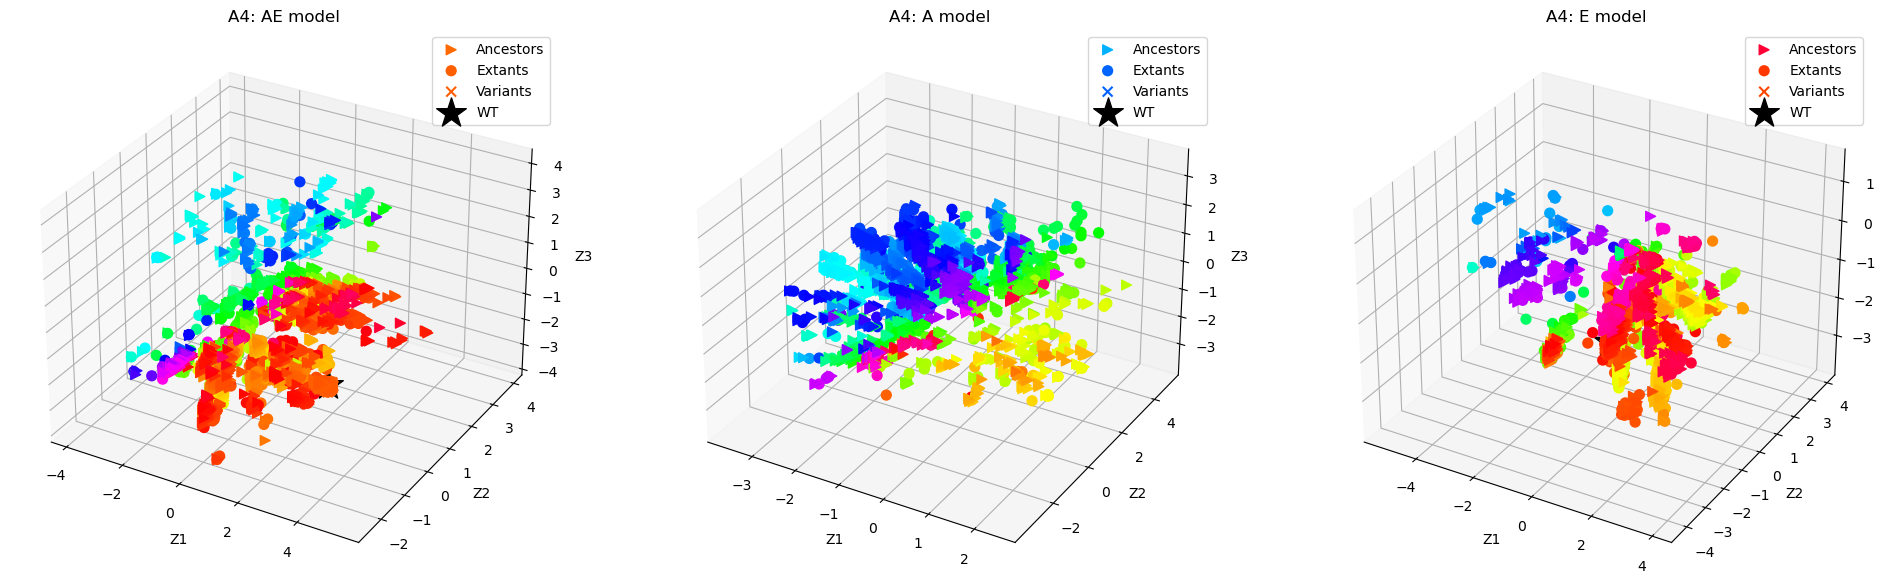

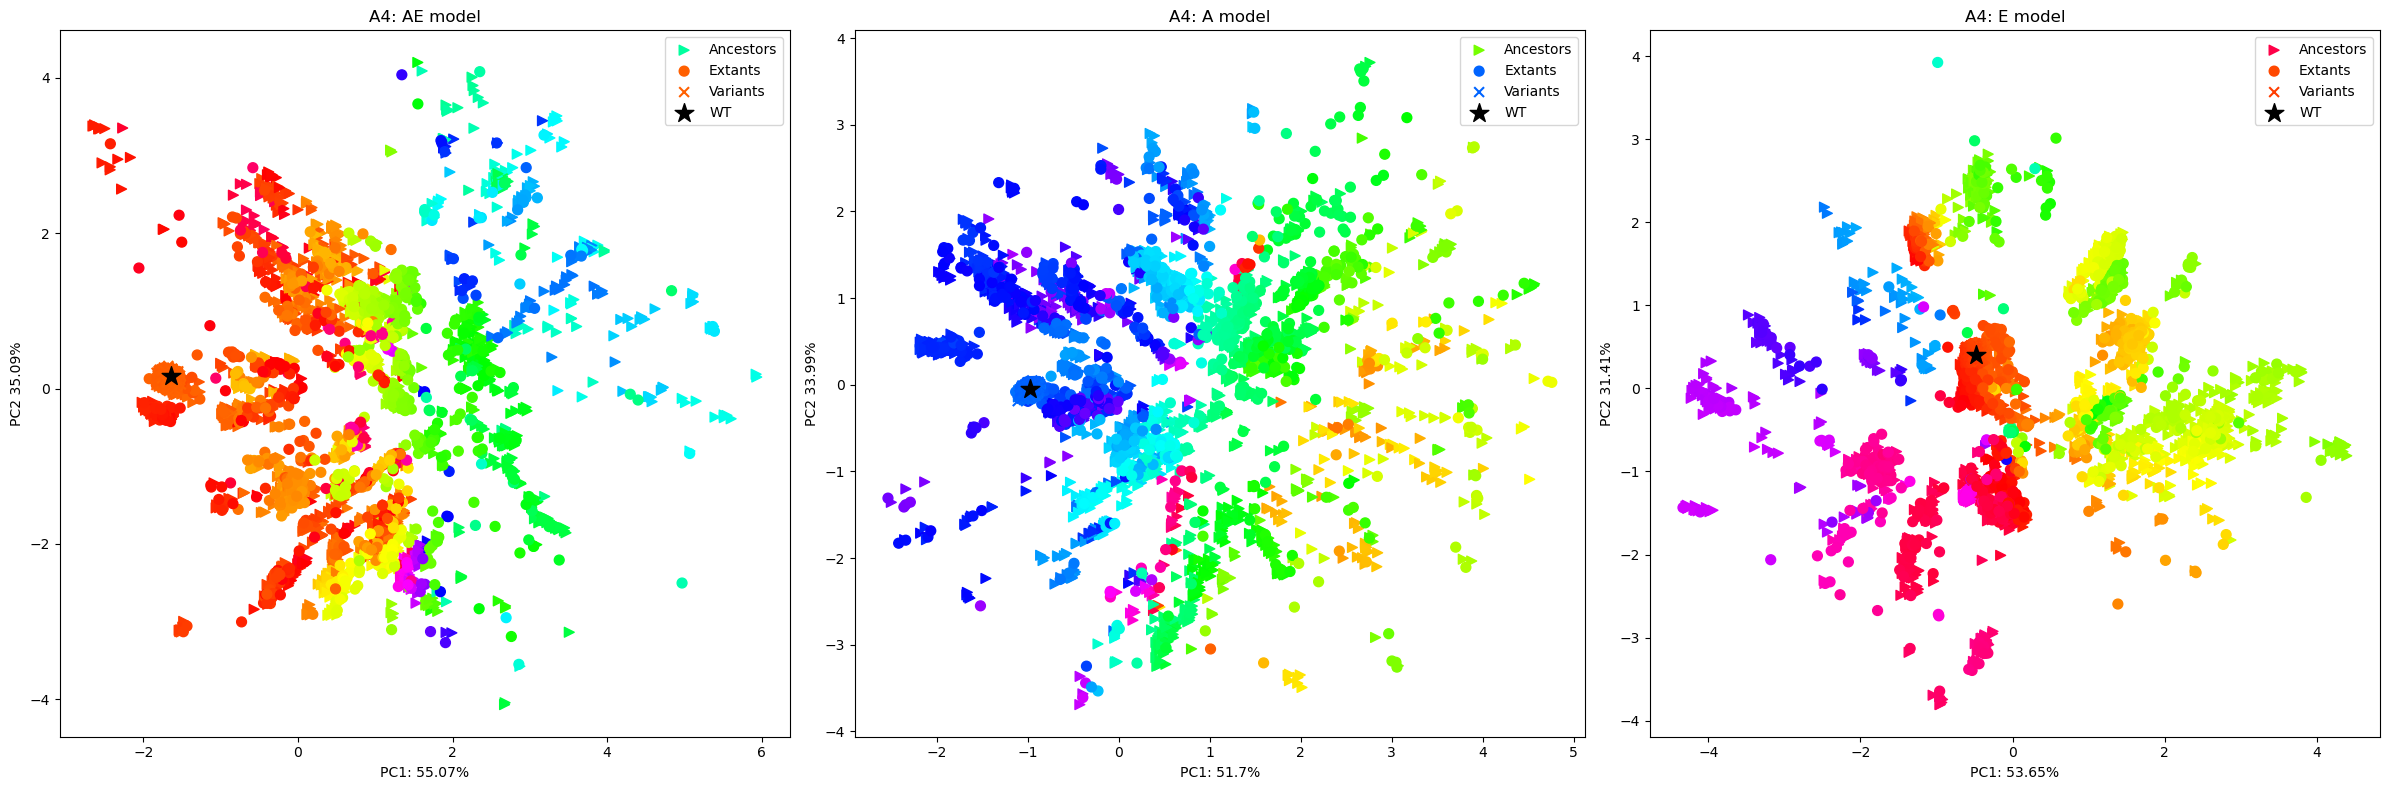

In [ ]:
model_reps = [a4_ae_latent, a4_a_latent, a4_e_latent]
labels = ["AE model", "A model", "E model"]

fig, axes = plt.subplots(1, 3, figsize=(24, 8), subplot_kw={'projection': '3d'})

for rep, label, ax in zip(model_reps, labels, axes):
    ax.set_title(label)
    vs.tree_vis_3d(rep, "A4_HUMAN/1-770", rgb=True, ax=ax)
    

#plt.tight_layout()
plt.savefig("a4_3D_rgb.png", dpi=300)
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(24, 8))

for rep, label, ax in zip(model_reps, labels, axes):
    ax.set_title(label)
    vs.tree_vis_2d(rep, "A4_HUMAN/1-770", rgb=True, ax=ax)


plt.tight_layout()
plt.savefig("a4_2D_rgb.png", dpi=300)
plt.show()

In [ ]:
path = "/Users/sebs_mac/uni_OneDrive/honours/data/a4_human/ancestors/"
a4_tree = path + "tree_1_ancestors_extants.aln"

vs.latent_tree_to_itol("a4", 
                 tree_seq_path=a4_tree, 
                 ae_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/a4_standard/a4_ae/a4_ae_r2/a4_ae_r2_model_state.pt",
                 a_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/a4_standard/a4_a/a4_a_r9/a4_a_r9_model_state.pt",
                 e_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/a4_standard/a4_e/a4_e_r9/a4_e_r9_model_state.pt",
                 settings=settings
                 )

Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/a4_human/ancestors/tree_1_ancestors_extants.aln
Checking for bad characters: ['B', 'J', 'X', 'Z', 'U']
Number of seqs: 10458


# GCN4

In [ ]:
path = "/Users/sebs_mac/uni_OneDrive/honours/data/gcn4/alns/"
gcn4_ae_latent, gcn4_a_latent, gcn4_e_latent = vs.get_model_embeddings(path, 
                                                                 ae_file_name="gcn4_ancestors_extants_no_dupes.pkl",
                                                                 variant_path="/Users/sebs_mac/git_repos/dms_data/DMS_ProteinGym_substitutions/GCN4_YEAST_Staller_2018.csv",
                                                                 ae_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/raw_data/gcn4_standard/gcn4_ae/gcn4_ae_r8/gcn4_ae_r8_model_state.pt",
                                                                 a_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/raw_data/gcn4_standard/gcn4_a/gcn4_a_r6/gcn4_a_r6_model_state.pt",
                                                                 e_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/raw_data/gcn4_standard/gcn4_e/gcn4_e_r1/gcn4_e_r1_model_state.pt",
                                                                 settings=settings)


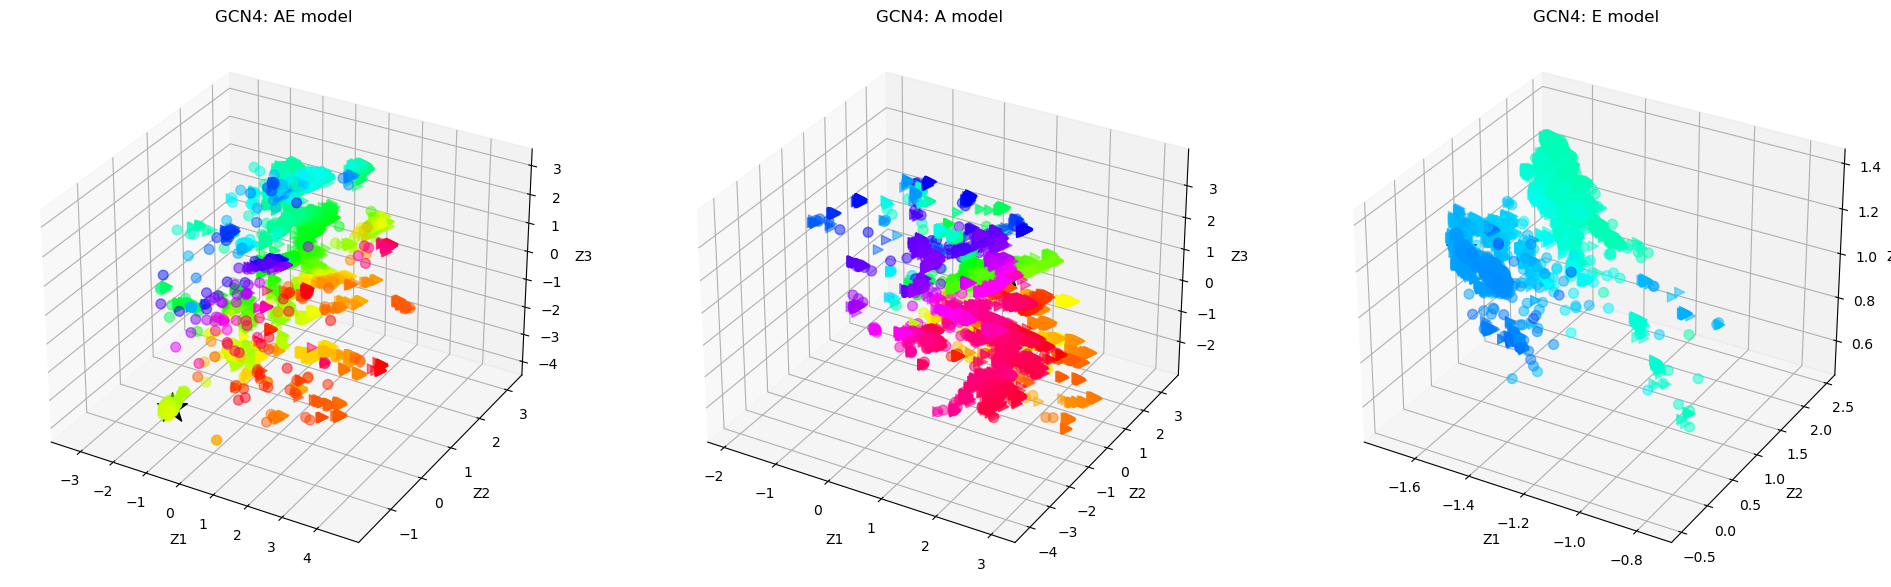

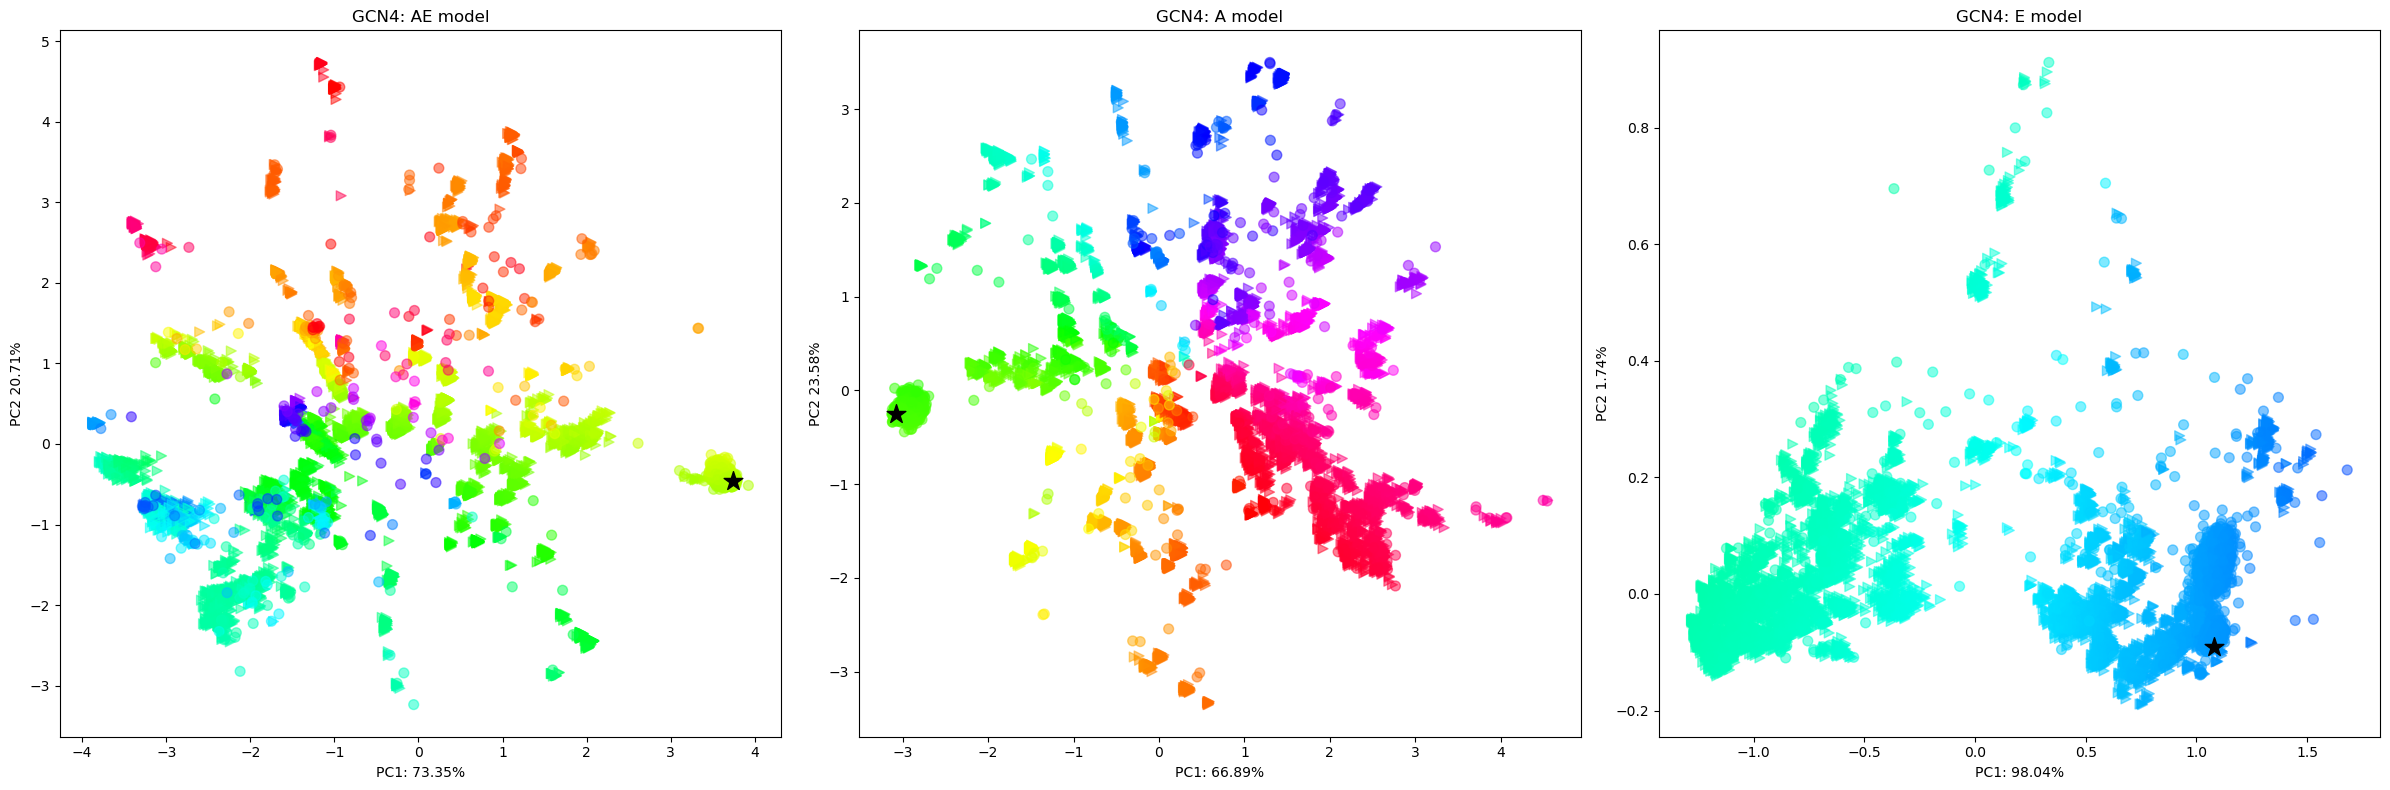

In [ ]:
model_reps = [gcn4_ae_latent, gcn4_a_latent, gcn4_e_latent]
labels = ["AE model", "A model", "E model"]

fig, axes = plt.subplots(1, 3, figsize=(24, 8), subplot_kw={'projection': '3d'})

for rep, label, ax in zip(model_reps, labels, axes):
    ax.set_title("GCN4: " + label)
    vs.tree_vis_3d(rep, "GCN4_YEAST/1-281", rgb=True, ax=ax)

#plt.tight_layout()
#plt.savefig("gcn4_3D_rgb.png", dpi=300)
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(24, 8))

for rep, label, ax in zip(model_reps, labels, axes):
    ax.set_title("GCN4: " + label)
    vs.tree_vis_2d(rep, "GCN4_YEAST/1-281", rgb=True, ax=ax)
   
plt.tight_layout()
#plt.savefig("gcn4_2D.png", dpi=300)
plt.show()

In [ ]:
path = "/Users/sebs_mac/uni_OneDrive/honours/data/gcn4/ancestors/"
gcn4_tree = path + "tree_0_ancestors_extants.aln"

vs.latent_tree_to_itol("gcn4", 
                 tree_seq_path=gcn4_tree, 
                 ae_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/gcn4_standard/gcn4_ae/gcn4_ae_r8/gcn4_ae_r8_model_state.pt",
                 a_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/gcn4_standard/gcn4_a/gcn4_a_r6/gcn4_a_r6_model_state.pt",
                 e_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/gcn4_standard/gcn4_e/gcn4_e_r1/gcn4_e_r1_model_state.pt",
                 settings=settings
                 )

Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/gcn4/ancestors/tree_0_ancestors_extants.aln
Checking for bad characters: ['B', 'J', 'X', 'Z', 'U']
Number of seqs: 694


# MAFG 

In [ ]:
path = "/Users/sebs_mac/uni_OneDrive/honours/data/mafg_mouse/alns/"
mafg_ae_latent, mafg_a_latent, mafg_e_latent = vs.get_model_embeddings(path, 
                                                                 ae_file_name="mafg_ancestors_extants_no_dupes.pkl",
                                                                 variant_path="/Users/sebs_mac/git_repos/dms_data/DMS_ProteinGym_substitutions/MAFG_MOUSE_Tsuboyama_2023_1K1V.csv",
                                                                 ae_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/mafg_standard/mafg_ae/mafg_ae_r1/mafg_ae_r1_model_state.pt",
                                                                 a_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/mafg_standard/mafg_a/mafg_a_r1/mafg_a_r1_model_state.pt",
                                                                 e_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/mafg_standard/mafg_e/mafg_e_r1/mafg_e_r1_model_state.pt",
                                                                 settings=settings)


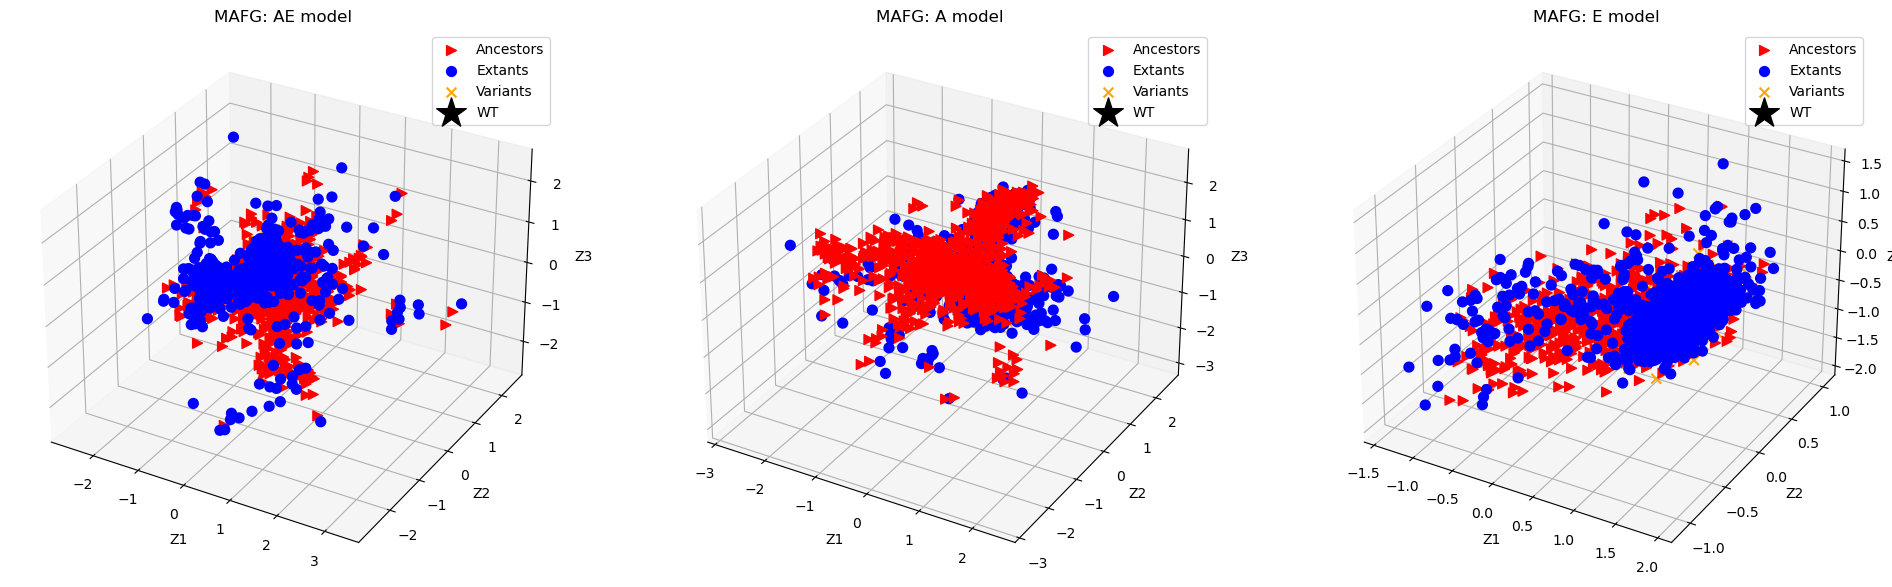

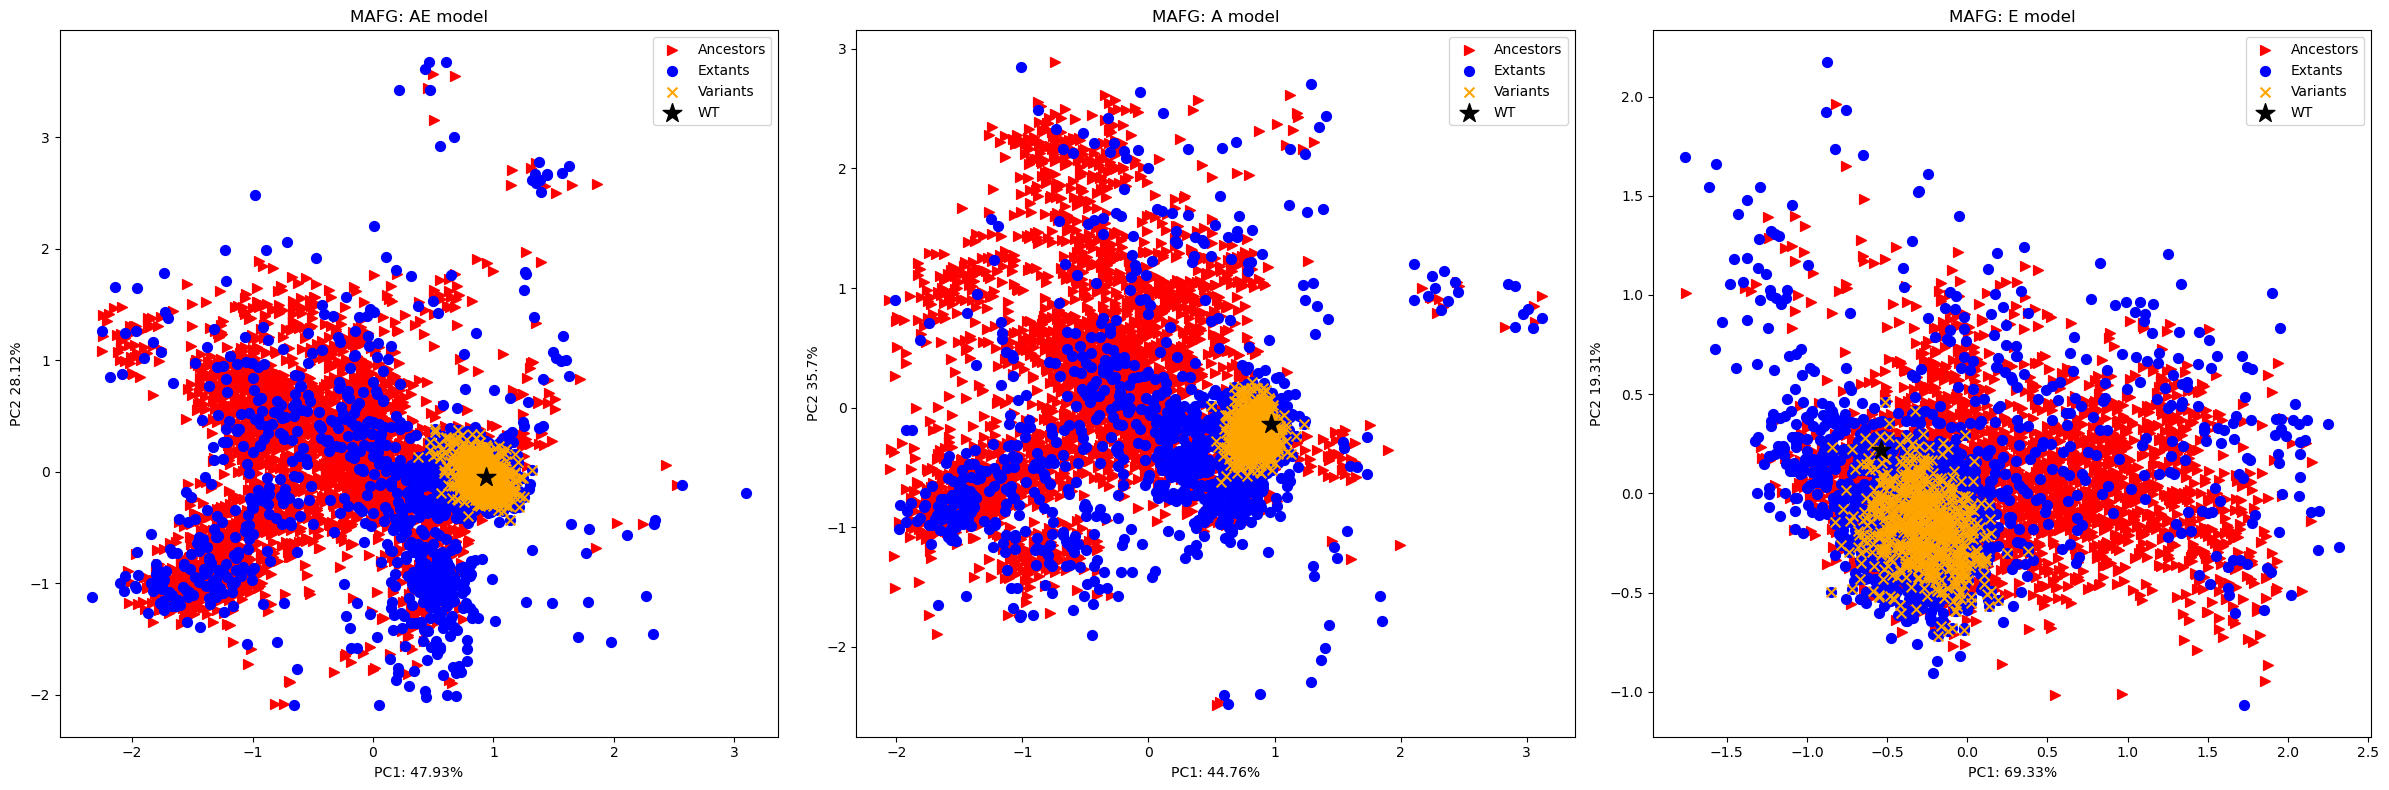

In [ ]:
model_reps = [mafg_ae_latent, mafg_a_latent, mafg_e_latent]
labels = ["AE model", "A model", "E model"]

fig, axes = plt.subplots(1, 3, figsize=(24, 8), subplot_kw={'projection': '3d'})

for rep, label, ax in zip(model_reps, labels, axes):
    vs.plot_latent_3D(rep, "MAFG_MOUSE/1-41", label, ax, "MAFG", rgb=False,ext_frac=0.5, anc_frac=0.3, var_frac=1)

  
#plt.tight_layout()
plt.savefig("mafg_3D.png", dpi=300)
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(24, 8))

for rep, label, ax in zip(model_reps, labels, axes):
    vs.plot_latent_2D(rep, "MAFG_MOUSE/1-41", label, ax, "MAFG", rgb=False, var_frac=1)

plt.tight_layout()
plt.savefig("mafg_2D.png", dpi=300)
plt.show()

In [ ]:
path = "/Users/sebs_mac/uni_OneDrive/honours/data/mafg_mouse/ancestors/"
mafg_tree = path + "tree_0_ancestors_extants.aln"

vs.latent_tree_to_itol("mafg", 
                 tree_seq_path=mafg_tree, 
                 ae_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/mafg_standard/mafg_ae/mafg_ae_r1/mafg_ae_r1_model_state.pt",
                 a_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/mafg_standard/mafg_a/mafg_a_r1/mafg_a_r1_model_state.pt",
                 e_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/mafg_standard/mafg_e/mafg_e_r1/mafg_e_r1_model_state.pt",
                 settings=settings
                 )

Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/mafg_mouse/ancestors/tree_0_ancestors_extants.aln
Checking for bad characters: ['B', 'J', 'X', 'Z', 'U']
Number of seqs: 12328


# Visualising single trees

## Cassowary RNAseZ

Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/cassowary/vis/tree_1_ancestors_extants.fasta
Checking for bad characters: ['B', 'J', 'Z', 'U']
Number of seqs: 485


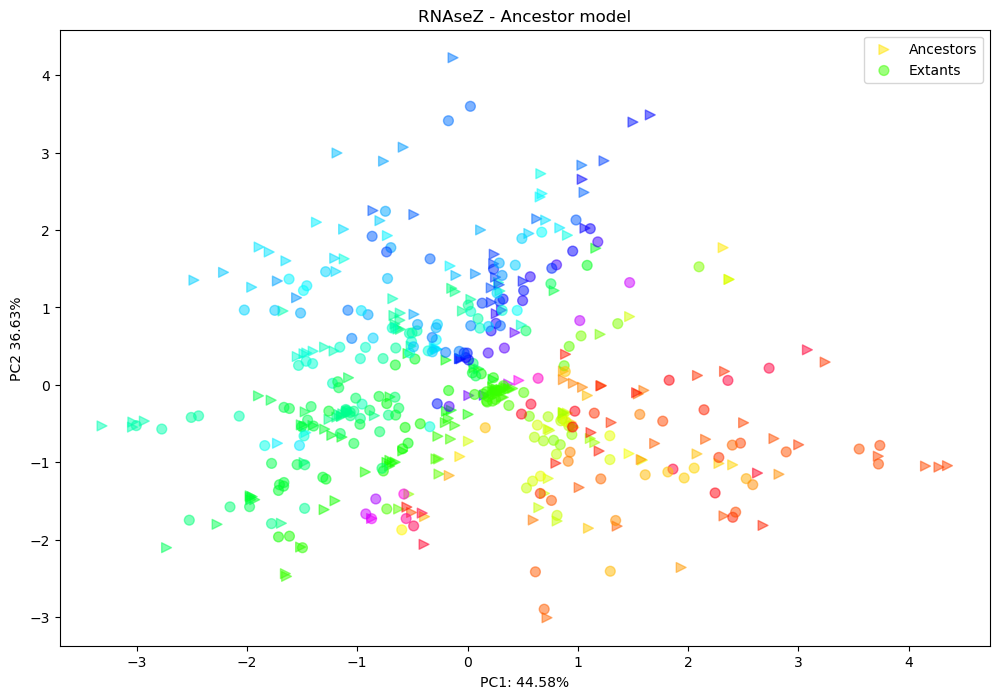

Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/cassowary/vis/tree_1_ancestors_extants.fasta
Checking for bad characters: ['B', 'J', 'Z', 'U']
Number of seqs: 485


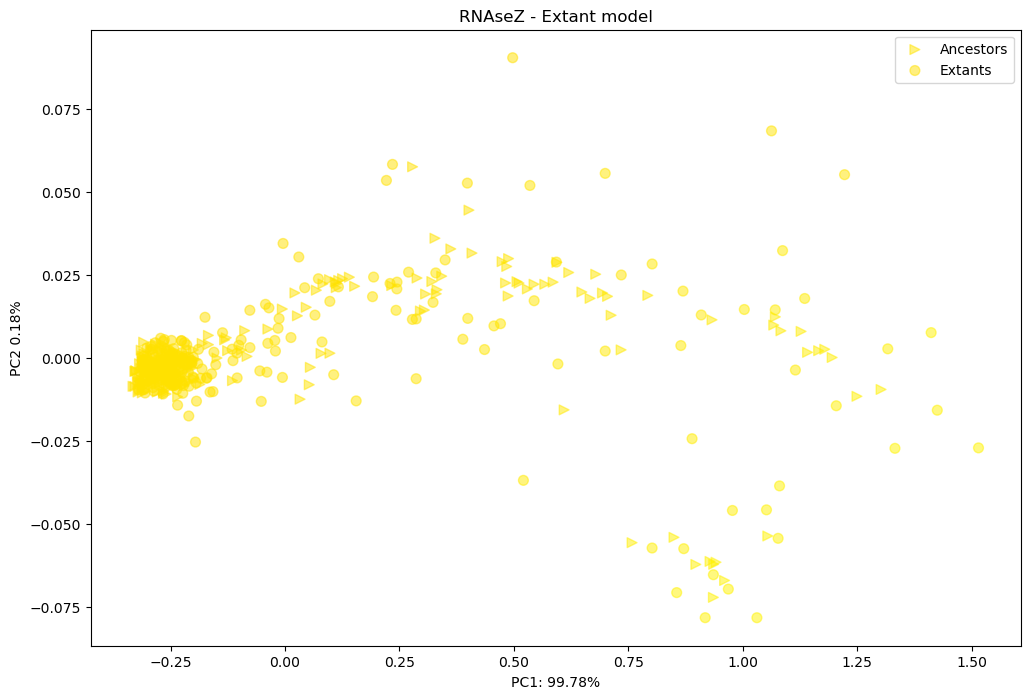

Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/cassowary/vis/tree_1_ancestors_extants.fasta
Checking for bad characters: ['B', 'J', 'Z', 'U']
Number of seqs: 485


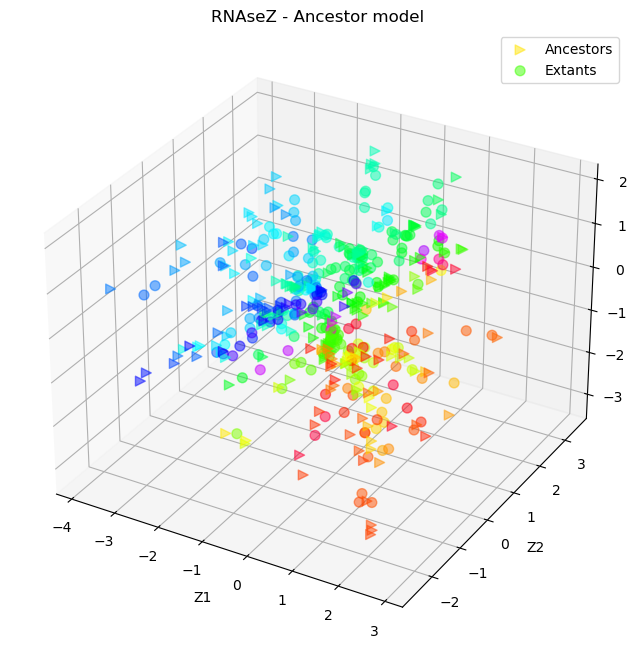

Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/cassowary/vis/tree_1_ancestors_extants.fasta
Checking for bad characters: ['B', 'J', 'Z', 'U']
Number of seqs: 485


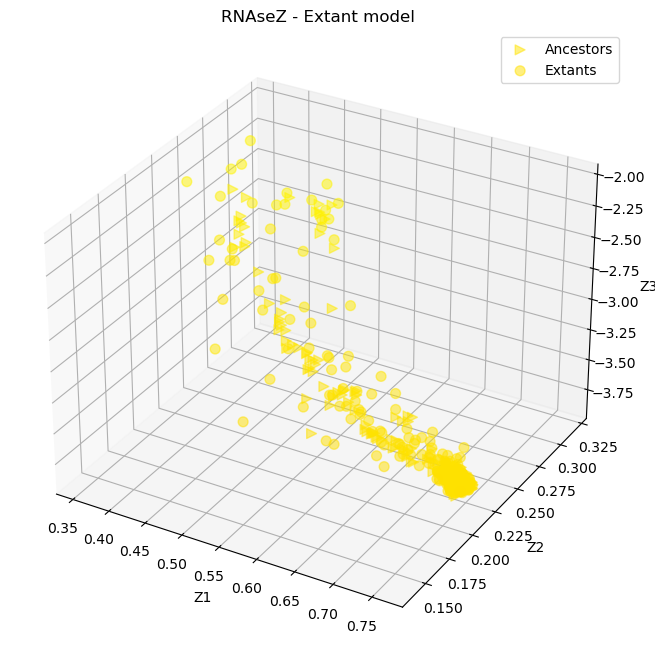

In [ ]:
path = "/Users/sebs_mac/uni_OneDrive/honours/data/cassowary/vis/"
cass_tree = path + "tree_1_ancestors_extants.fasta"
a_state_dict=  "/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/raw_data/cassowary_standard/cassowary_a_r1/cassowary_a_r1_model_state.pt"
e_state_dict = "/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/raw_data/cassowary_standard/cassowary_e_r1/cassowary_e_r1_model_state.pt"


vs.vis_tree(None, cass_tree, a_state_dict, settings, "RNAseZ - Ancestor model", rgb=True, lower_2d=True)
vs.vis_tree(None, cass_tree, e_state_dict, settings, "RNAseZ - Extant model", rgb=True, lower_2d=True)
vs.vis_tree(None, cass_tree, a_state_dict, settings, "RNAseZ - Ancestor model", rgb=True)
vs.vis_tree(None, cass_tree, e_state_dict, settings, "RNAseZ - Extant model", rgb=True)

## GB1

Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/gb1/ancestors/anc_tree_1_ancestors_extants.aln
Checking for bad characters: ['B', 'J', 'Z', 'U']
Number of seqs: 6166


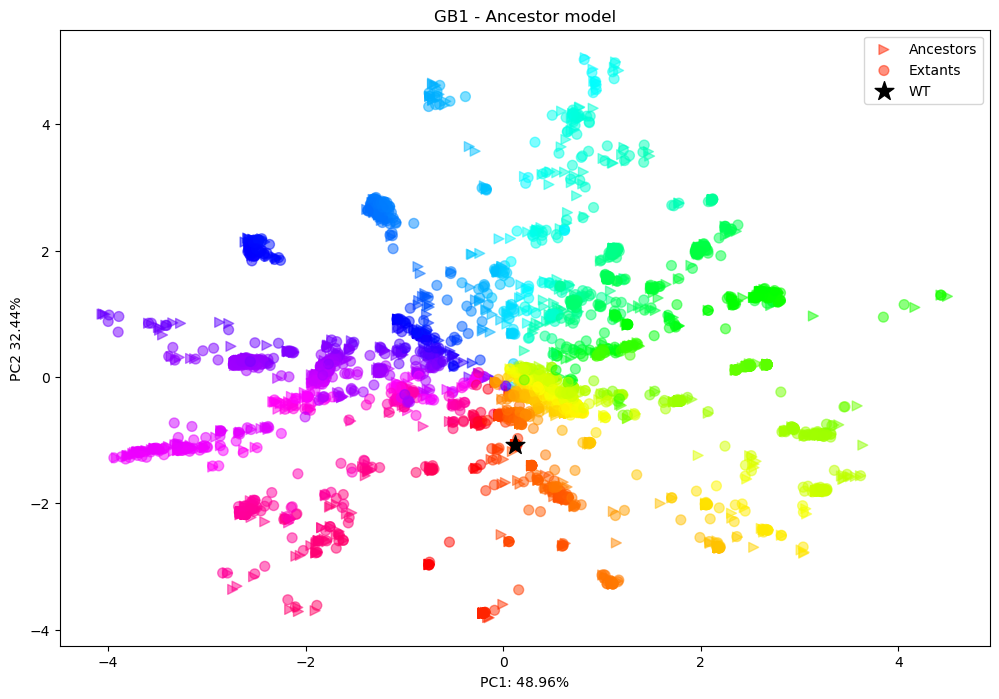

Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/gb1/ancestors/anc_tree_1_ancestors_extants.aln
Checking for bad characters: ['B', 'J', 'Z', 'U']
Number of seqs: 6166


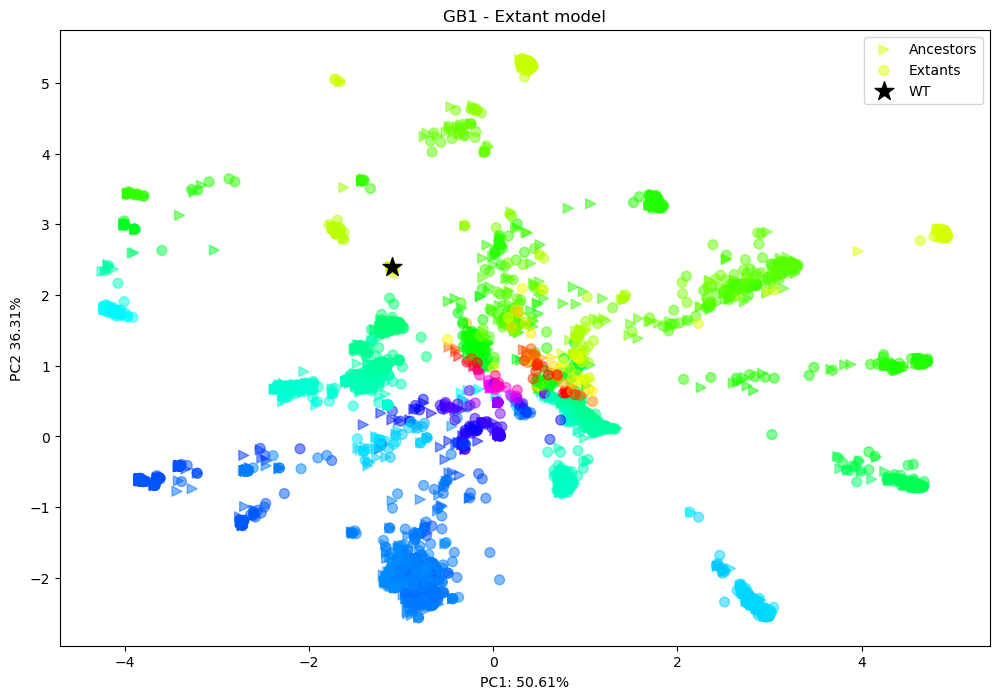

Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/gb1/ancestors/anc_tree_1_ancestors_extants.aln
Checking for bad characters: ['B', 'J', 'Z', 'U']
Number of seqs: 6166


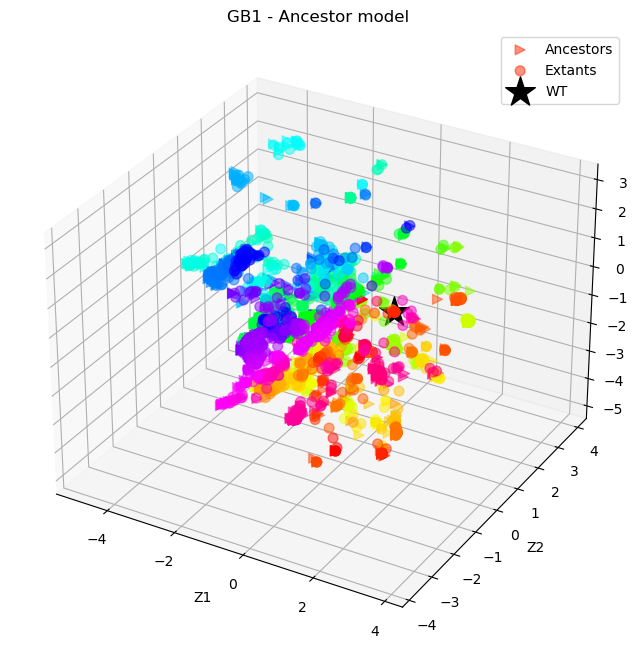

Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/gb1/ancestors/anc_tree_1_ancestors_extants.aln
Checking for bad characters: ['B', 'J', 'Z', 'U']
Number of seqs: 6166


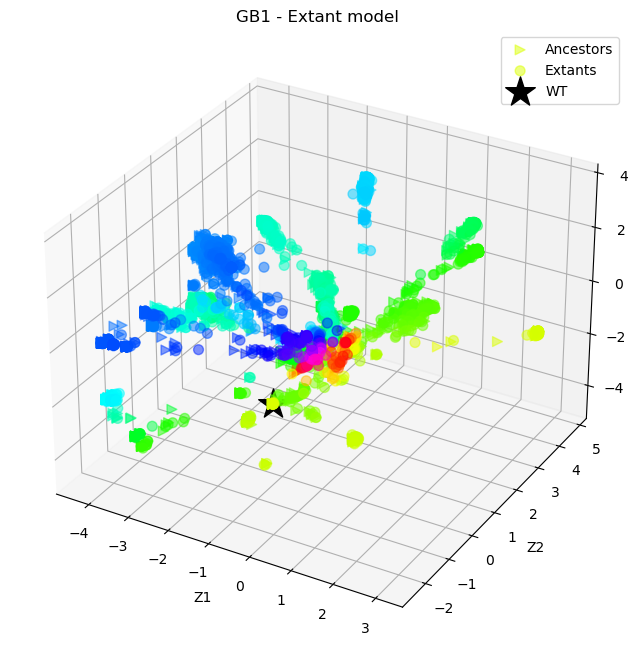

In [ ]:
path = "/Users/sebs_mac/uni_OneDrive/honours/data/gb1/ancestors/"
gb1_tree = path + "anc_tree_1_ancestors_extants.aln"
a_state_dict=  "/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/raw_data/gb1_standard/gb1_a/gb1_a_r1/gb1_a_r1_model_state.pt"
e_state_dict = "/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/raw_data/gb1_standard/gb1_e/gb1_e_r1/gb1_e_r1_model_state.pt"

vs.vis_tree("SPG1_STRSG/1-448", gb1_tree, a_state_dict, settings, "GB1 - Ancestor model", rgb=True, lower_2d=True)
vs.vis_tree("SPG1_STRSG/1-448", gb1_tree, e_state_dict, settings, "GB1 - Extant model", rgb=True, lower_2d=True)
vs.vis_tree("SPG1_STRSG/1-448", gb1_tree, a_state_dict, settings, "GB1 - Ancestor model", rgb=True)
vs.vis_tree("SPG1_STRSG/1-448", gb1_tree, e_state_dict, settings, "GB1 - Extant model", rgb=True)

## MAFG

Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/mafg_mouse/ancestors/tree_0_ancestors_extants.aln
Checking for bad characters: ['B', 'J', 'Z', 'U']
Number of seqs: 12328
               id                                                 mu
0  N0_mafg_tree_0  [0.2857343554496765, 0.3052193224430084, -0.60...
1  N1_mafg_tree_0  [0.2857343554496765, 0.3052193224430084, -0.60...
2  N2_mafg_tree_0  [0.2857343554496765, 0.3052193224430084, -0.60...
3  N3_mafg_tree_0  [0.2857343554496765, 0.3052193224430084, -0.60...
4  N4_mafg_tree_0  [0.2857343554496765, 0.3052193224430084, -0.60...


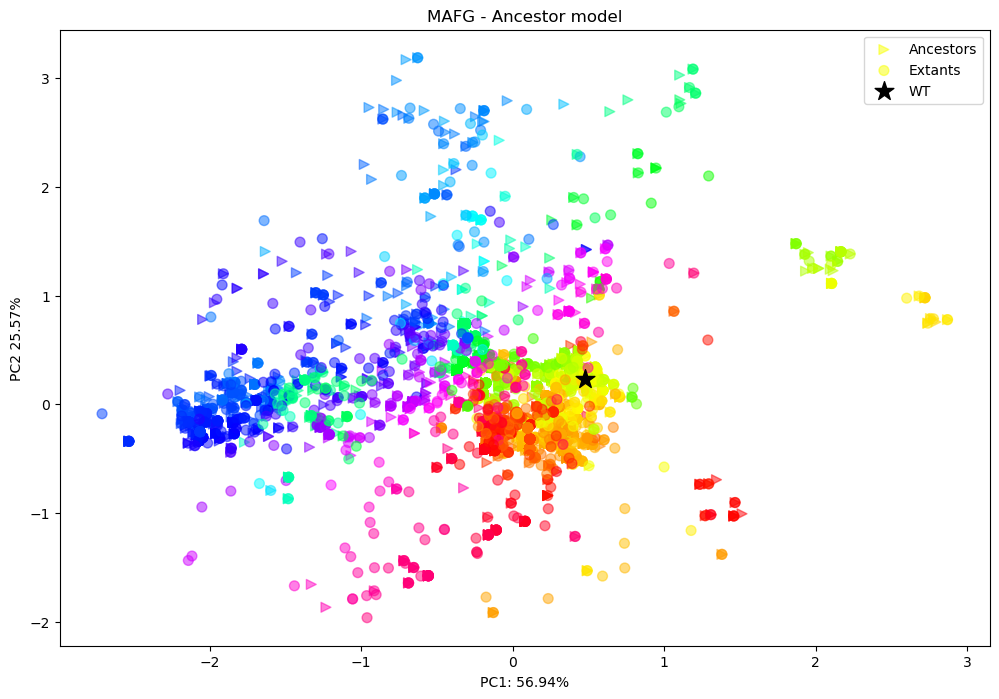

Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/mafg_mouse/ancestors/tree_0_ancestors_extants.aln
Checking for bad characters: ['B', 'J', 'Z', 'U']
Number of seqs: 12328
               id                                                 mu
0  N0_mafg_tree_0  [1.1000943183898926, 0.1517861932516098, -0.52...
1  N1_mafg_tree_0  [1.1000943183898926, 0.1517861932516098, -0.52...
2  N2_mafg_tree_0  [1.1000943183898926, 0.1517861932516098, -0.52...
3  N3_mafg_tree_0  [1.1000943183898926, 0.1517861932516098, -0.52...
4  N4_mafg_tree_0  [1.1000943183898926, 0.1517861932516098, -0.52...


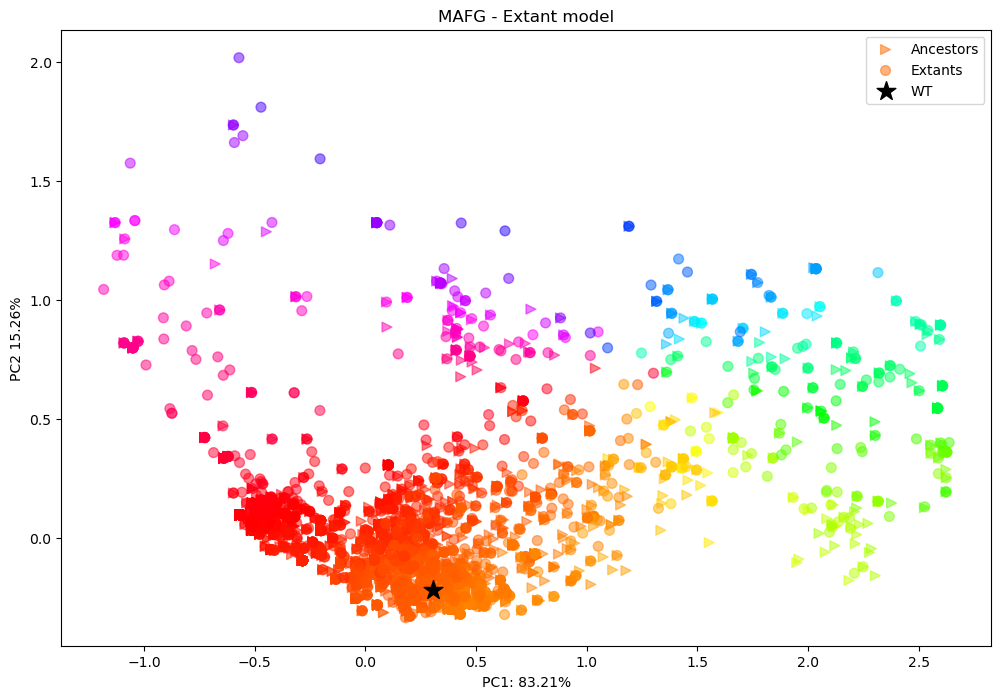

Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/mafg_mouse/ancestors/tree_0_ancestors_extants.aln
Checking for bad characters: ['B', 'J', 'Z', 'U']
Number of seqs: 12328
               id                                                 mu
0  N0_mafg_tree_0  [0.2857343554496765, 0.3052193224430084, -0.60...
1  N1_mafg_tree_0  [0.2857343554496765, 0.3052193224430084, -0.60...
2  N2_mafg_tree_0  [0.2857343554496765, 0.3052193224430084, -0.60...
3  N3_mafg_tree_0  [0.2857343554496765, 0.3052193224430084, -0.60...
4  N4_mafg_tree_0  [0.2857343554496765, 0.3052193224430084, -0.60...


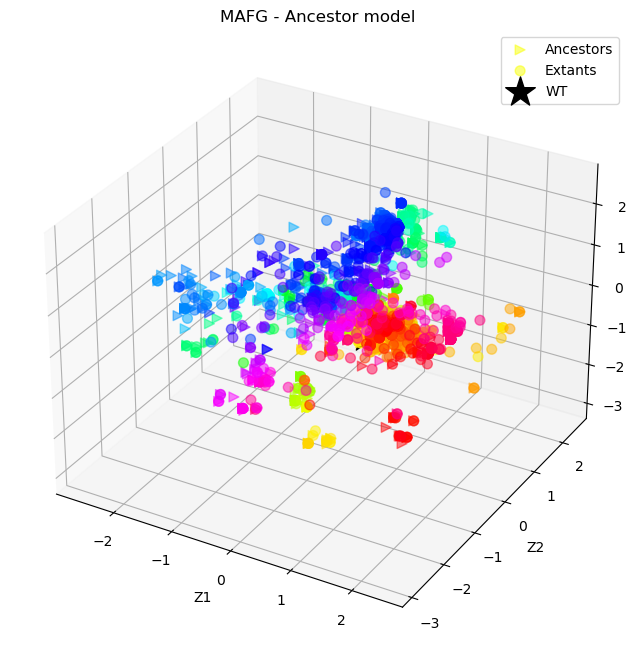

Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/mafg_mouse/ancestors/tree_0_ancestors_extants.aln
Checking for bad characters: ['B', 'J', 'Z', 'U']
Number of seqs: 12328
               id                                                 mu
0  N0_mafg_tree_0  [1.1000943183898926, 0.1517861932516098, -0.52...
1  N1_mafg_tree_0  [1.1000943183898926, 0.1517861932516098, -0.52...
2  N2_mafg_tree_0  [1.1000943183898926, 0.1517861932516098, -0.52...
3  N3_mafg_tree_0  [1.1000943183898926, 0.1517861932516098, -0.52...
4  N4_mafg_tree_0  [1.1000943183898926, 0.1517861932516098, -0.52...


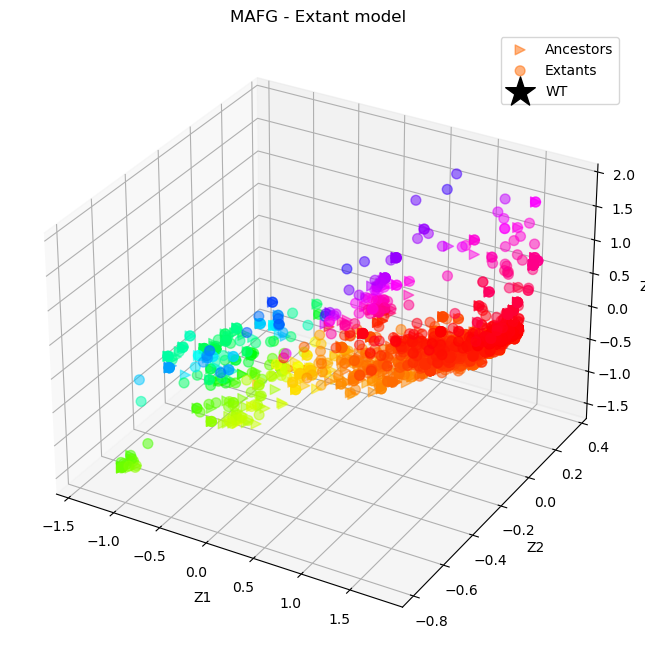

In [ ]:
path = "/Users/sebs_mac/uni_OneDrive/honours/data/mafg_mouse/ancestors/"
mafg_tree = path + "tree_0_ancestors_extants.aln"
a_state_dict=  "/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/raw_data/mafg_standard/mafg_a/mafg_a_r1/mafg_a_r1_model_state.pt"
e_state_dict = "/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/raw_data/mafg_standard/mafg_e/mafg_e_r1/mafg_e_r1_model_state.pt"


vs.vis_tree("MAFG_MOUSE/1-41", mafg_tree, a_state_dict, settings, "MAFG - Ancestor model", rgb=True, lower_2d=True)
vs.vis_tree("MAFG_MOUSE/1-41", mafg_tree, e_state_dict, settings, "MAFG - Extant model", rgb=True, lower_2d=True)
vs.vis_tree("MAFG_MOUSE/1-41", mafg_tree, a_state_dict, settings, "MAFG - Ancestor model", rgb=True)
vs.vis_tree("MAFG_MOUSE/1-41", mafg_tree, e_state_dict, settings, "MAFG - Extant model", rgb=True)


Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/gcn4/ancestors/tree_0_ancestors_extants.aln
Checking for bad characters: ['B', 'J', 'Z', 'U']
Number of seqs: 694
               id                                                 mu
0  N0_gcn4_tree_0  [-0.47751766443252563, 0.9758719801902771, -3....
1  N1_gcn4_tree_0  [-0.486677348613739, 0.9762786626815796, -3.58...
2  N2_gcn4_tree_0  [-0.486677348613739, 0.9762786626815796, -3.58...
3  N3_gcn4_tree_0  [-0.486677348613739, 0.9762786626815796, -3.58...
4  N4_gcn4_tree_0  [-0.486677348613739, 0.9762786626815796, -3.58...


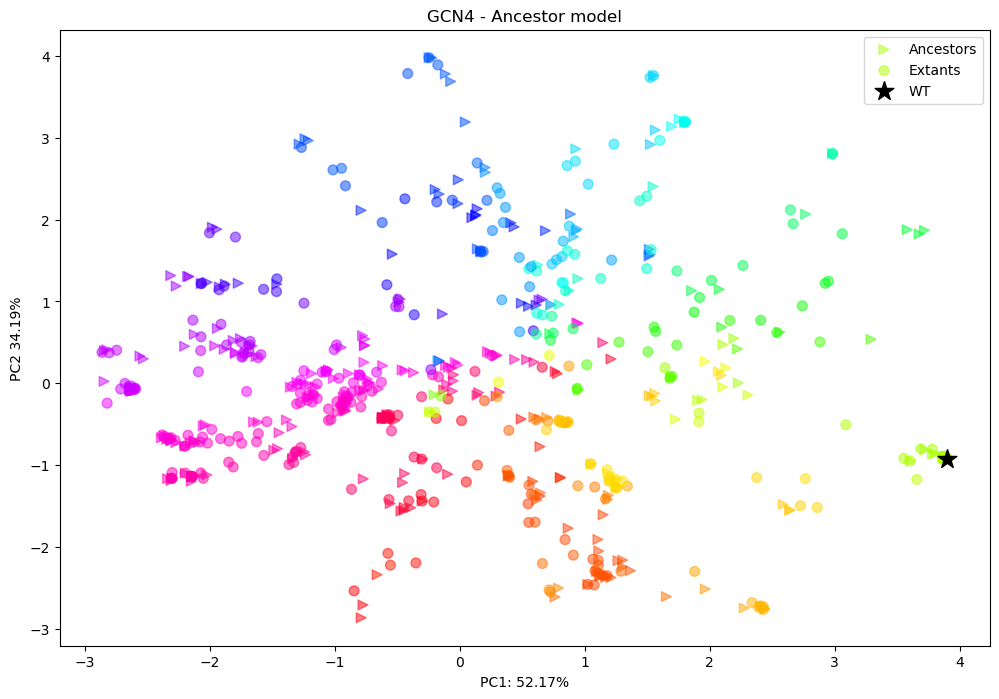

Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/gcn4/ancestors/tree_0_ancestors_extants.aln
Checking for bad characters: ['B', 'J', 'Z', 'U']
Number of seqs: 694
               id                                                 mu
0  N0_gcn4_tree_0  [-1.598402976989746, 0.16678865253925323, 1.24...
1  N1_gcn4_tree_0  [-1.6053928136825562, 0.17522014677524567, 1.2...
2  N2_gcn4_tree_0  [-1.6053928136825562, 0.17522014677524567, 1.2...
3  N3_gcn4_tree_0  [-1.6053928136825562, 0.17522014677524567, 1.2...
4  N4_gcn4_tree_0  [-1.6053928136825562, 0.17522014677524567, 1.2...


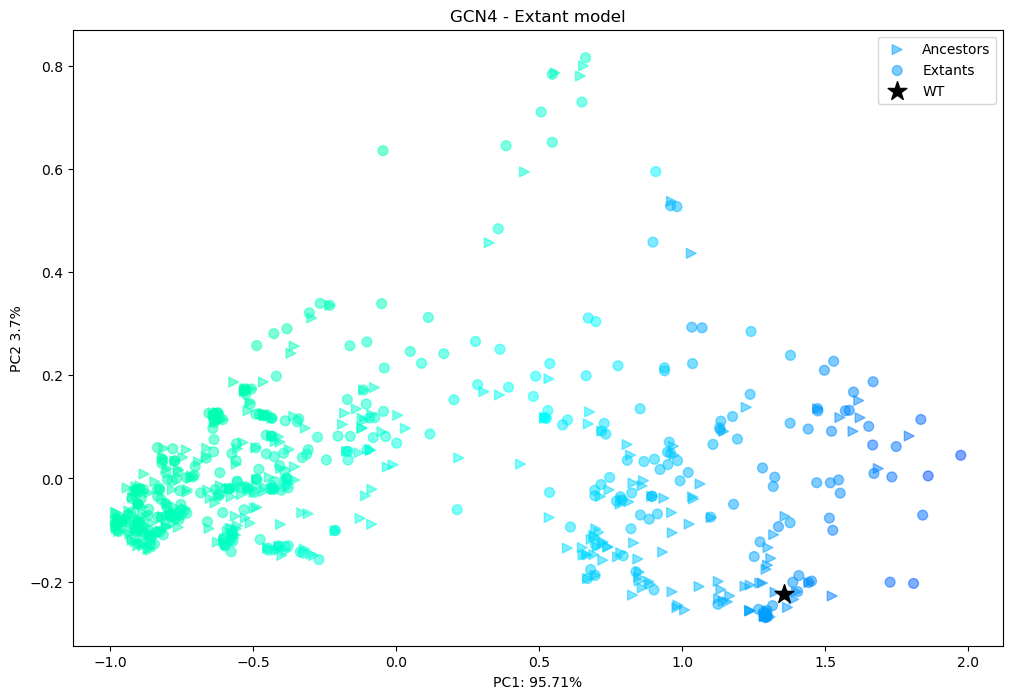

Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/gcn4/ancestors/tree_0_ancestors_extants.aln
Checking for bad characters: ['B', 'J', 'Z', 'U']
Number of seqs: 694
               id                                                 mu
0  N0_gcn4_tree_0  [-0.47751766443252563, 0.9758719801902771, -3....
1  N1_gcn4_tree_0  [-0.486677348613739, 0.9762786626815796, -3.58...
2  N2_gcn4_tree_0  [-0.486677348613739, 0.9762786626815796, -3.58...
3  N3_gcn4_tree_0  [-0.486677348613739, 0.9762786626815796, -3.58...
4  N4_gcn4_tree_0  [-0.486677348613739, 0.9762786626815796, -3.58...


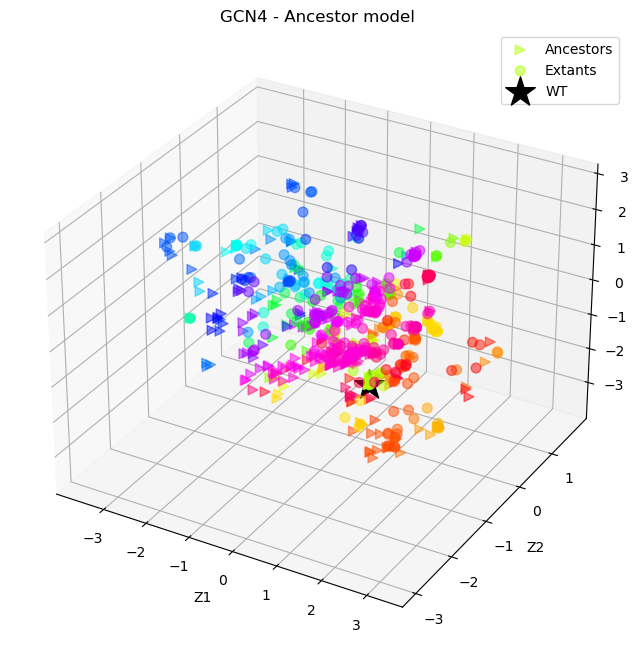

Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/gcn4/ancestors/tree_0_ancestors_extants.aln
Checking for bad characters: ['B', 'J', 'Z', 'U']
Number of seqs: 694
               id                                                 mu
0  N0_gcn4_tree_0  [-1.598402976989746, 0.16678865253925323, 1.24...
1  N1_gcn4_tree_0  [-1.6053928136825562, 0.17522014677524567, 1.2...
2  N2_gcn4_tree_0  [-1.6053928136825562, 0.17522014677524567, 1.2...
3  N3_gcn4_tree_0  [-1.6053928136825562, 0.17522014677524567, 1.2...
4  N4_gcn4_tree_0  [-1.6053928136825562, 0.17522014677524567, 1.2...


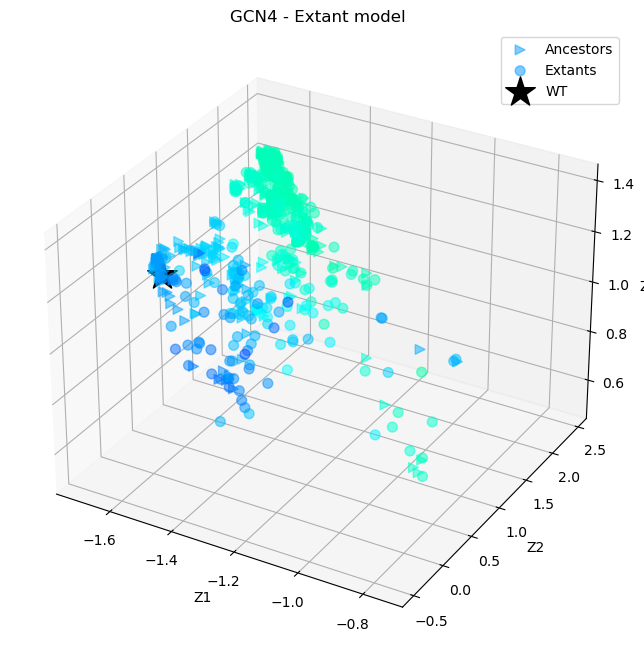

In [ ]:

path = "/Users/sebs_mac/uni_OneDrive/honours/data/gcn4/ancestors/"
gcn4_tree = path + "tree_0_ancestors_extants.aln"

a_state_dict=  "/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/raw_data/gcn4_standard/gcn4_a/gcn4_a_r1/gcn4_a_r1_model_state.pt"
e_state_dict = "/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/raw_data/gcn4_standard/gcn4_e/gcn4_e_r1/gcn4_e_r1_model_state.pt"



vs.vis_tree("GCN4_YEAST/1-281", gcn4_tree, a_state_dict, settings, "GCN4 - Ancestor model", rgb=True, lower_2d=True)
vs.vis_tree("GCN4_YEAST/1-281", gcn4_tree, e_state_dict, settings, "GCN4 - Extant model", rgb=True, lower_2d=True)
vs.vis_tree("GCN4_YEAST/1-281", gcn4_tree, a_state_dict, settings, "GCN4 - Ancestor model", rgb=True)
vs.vis_tree("GCN4_YEAST/1-281", gcn4_tree, e_state_dict, settings, "GCN4 - Extant model", rgb=True)


Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/a4_human/ancestors/tree_1_ancestors_extants.aln
Checking for bad characters: ['B', 'J', 'Z', 'U']
Number of seqs: 10458


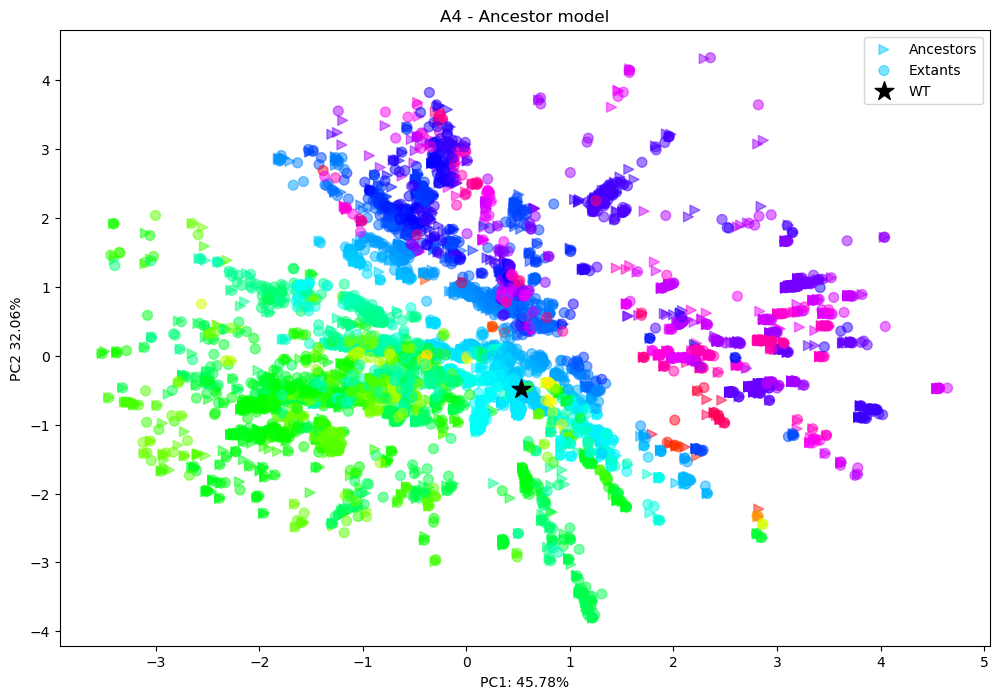

Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/a4_human/ancestors/tree_1_ancestors_extants.aln
Checking for bad characters: ['B', 'J', 'Z', 'U']
Number of seqs: 10458


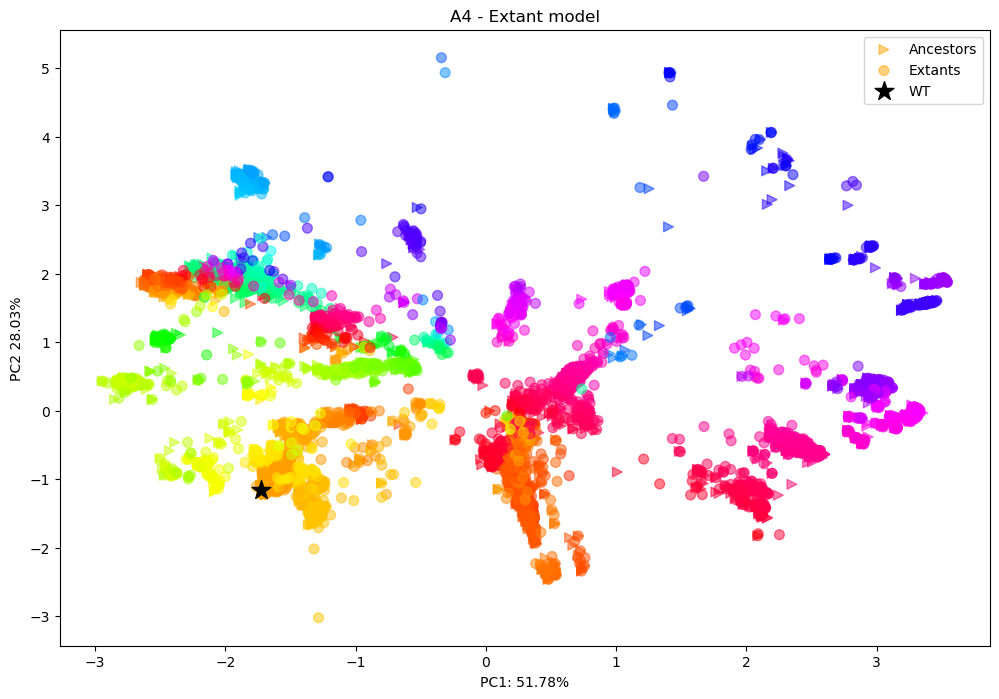

Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/a4_human/ancestors/tree_1_ancestors_extants.aln
Checking for bad characters: ['B', 'J', 'Z', 'U']
Number of seqs: 10458


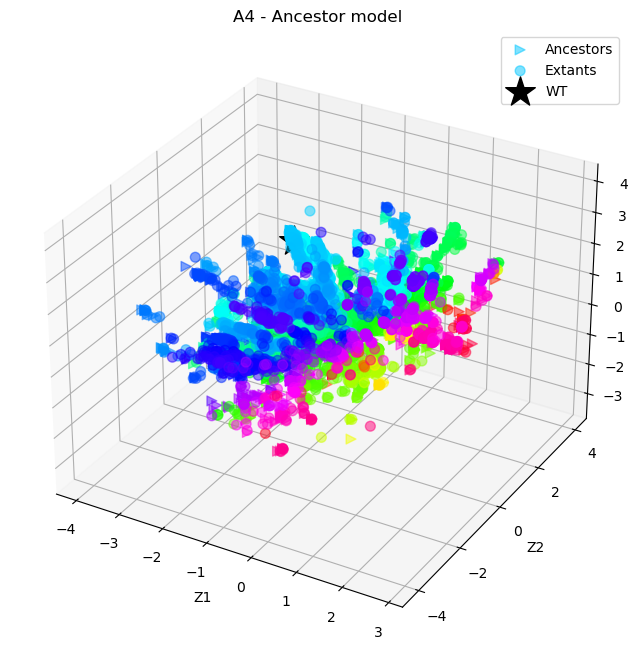

Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/a4_human/ancestors/tree_1_ancestors_extants.aln
Checking for bad characters: ['B', 'J', 'Z', 'U']
Number of seqs: 10458


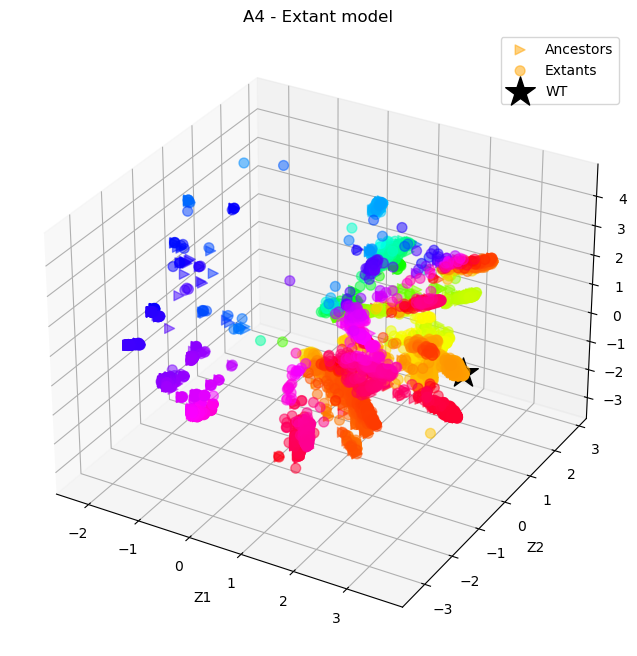

In [4]:

path = "/Users/sebs_mac/uni_OneDrive/honours/data/a4_human/ancestors/"
a4_tree = path + "tree_1_ancestors_extants.aln"

a_state_dict=  "/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/raw_data/a4_standard/a4_a/a4_a_r1/a4_a_r1_model_state.pt"
e_state_dict = "/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/raw_data/a4_standard/a4_e/a4_e_r1/a4_e_r1_model_state.pt"

vs.vis_tree("A4_HUMAN/1-770", a4_tree, a_state_dict, settings, "A4 - Ancestor model", rgb=True, lower_2d=True)
vs.vis_tree("A4_HUMAN/1-770", a4_tree, e_state_dict, settings, "A4 - Extant model", rgb=True, lower_2d=True)
vs.vis_tree("A4_HUMAN/1-770", a4_tree, a_state_dict, settings,  "A4 - Ancestor model", rgb=True)
vs.vis_tree("A4_HUMAN/1-770", a4_tree, e_state_dict, settings, "A4 - Extant model", rgb=True)


### GFP

Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/gfp/independent_runs/no_synthetic/vis/tree_1_ancestors_extants.aln
Checking for bad characters: ['B', 'J', 'Z', 'U']
Number of seqs: 719


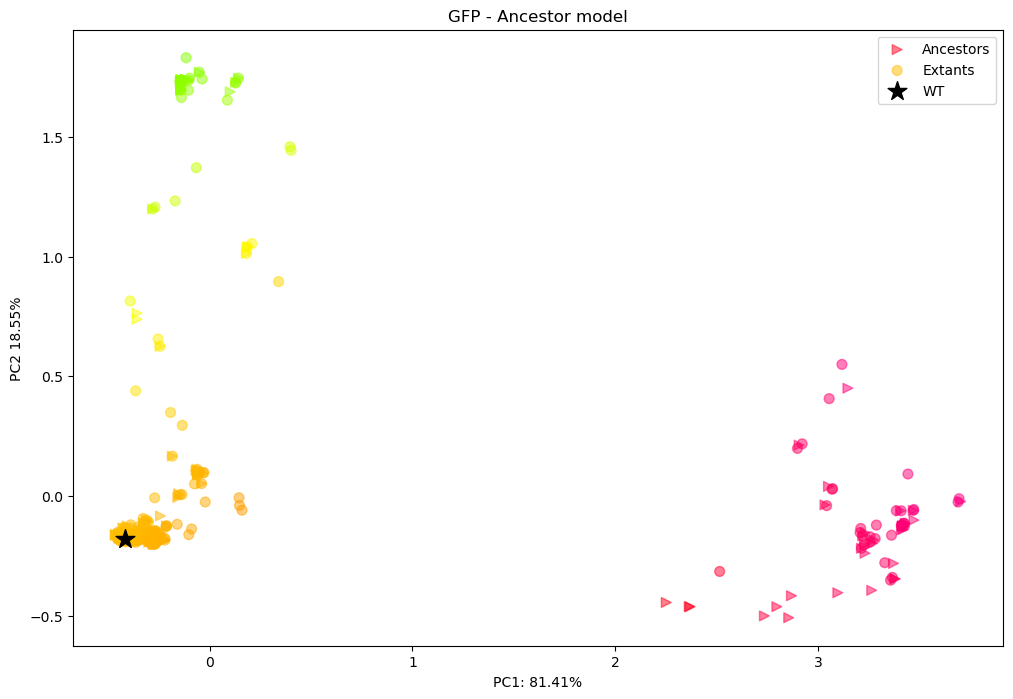

Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/gfp/independent_runs/no_synthetic/vis/tree_1_ancestors_extants.aln
Checking for bad characters: ['B', 'J', 'Z', 'U']
Number of seqs: 719


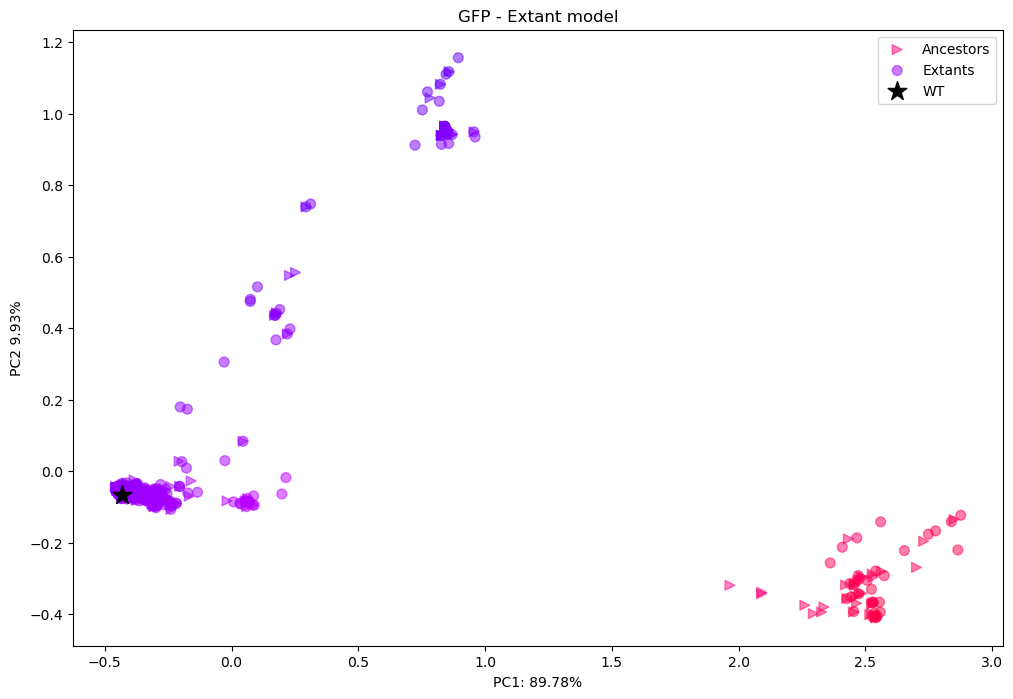

Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/gfp/independent_runs/no_synthetic/vis/tree_1_ancestors_extants.aln
Checking for bad characters: ['B', 'J', 'Z', 'U']
Number of seqs: 719


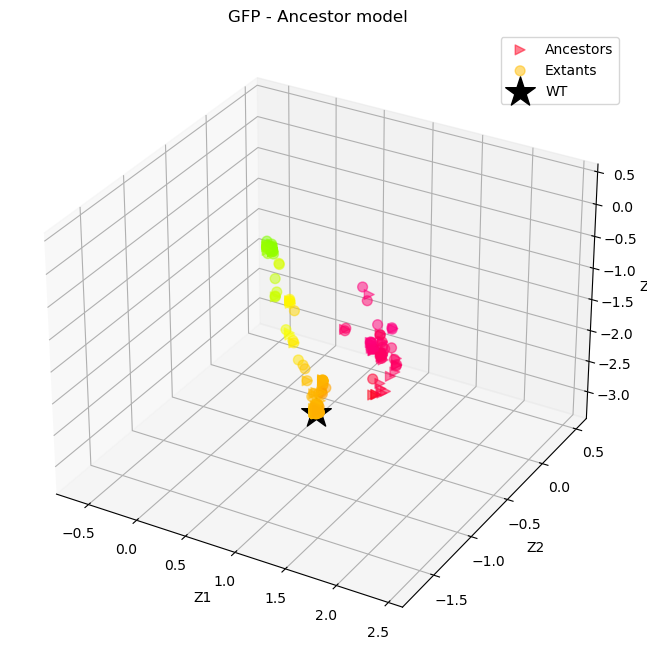

Reading the alignment: /Users/sebs_mac/uni_OneDrive/honours/data/gfp/independent_runs/no_synthetic/vis/tree_1_ancestors_extants.aln
Checking for bad characters: ['B', 'J', 'Z', 'U']
Number of seqs: 719


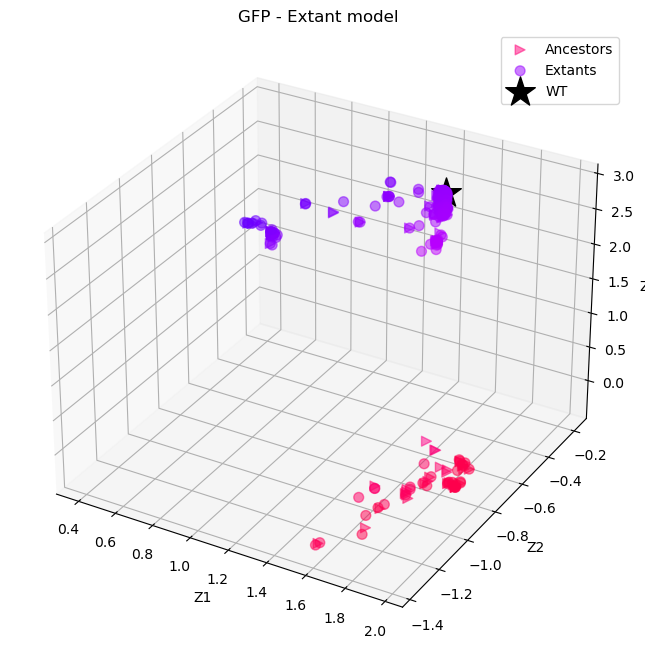

In [3]:

path = "/Users/sebs_mac/uni_OneDrive/honours/data/gfp/independent_runs/no_synthetic/vis/"
gfp_tree = path + "tree_1_ancestors_extants.aln"

a_state_dict=  "/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/raw_data/gfp_standard/gfp_a/gfp_a_r4/gfp_a_r4_model_state.pt"
e_state_dict = "/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/raw_data/gfp_standard/gfp_e/gfp_e_r10/gfp_e_r10_model_state.pt"

vs.vis_tree("GFP_AEQVI/1-238", gfp_tree, a_state_dict, settings, "GFP - Ancestor model", rgb=True, lower_2d=True)
vs.vis_tree("GFP_AEQVI/1-238", gfp_tree, e_state_dict, settings, "GFP - Extant model", rgb=True, lower_2d=True)
vs.vis_tree("GFP_AEQVI/1-238", gfp_tree, a_state_dict, settings, "GFP - Ancestor model", rgb=True)
vs.vis_tree("GFP_AEQVI/1-238", gfp_tree, e_state_dict, settings, "GFP - Extant model", rgb=True)


In [ ]:
path = "/Users/sebs_mac/uni_OneDrive/honours/data/gfp/independent_runs/no_synthetic/ancestors/auto_rooted/ancestors/"
gfp_tree = path + "run_1_ancestors_extants.fa"

vs.latent_tree_to_itol("gfp", 
                 tree_seq_path=gfp_tree, 
                 ae_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/raw_data/gfp_standard/gfp_ae/gfp_ae_r9/gfp_ae_r9_model_state.pt",
                 a_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/raw_data/gfp_standard/gfp_a/gfp_a_r4/gfp_a_r4_model_state.pt",
                 e_state_dict="/Users/sebs_mac/uni_OneDrive/honours/data/standard_test_results/raw_data/gfp_standard/gfp_e/gfp_e_r10/gfp_e_r10_model_state.pt",
                 settings=settings
                 )